In [482]:
from enc import ctoi
from collections import Counter, defaultdict
from itertools import combinations
import math

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from dataclasses import dataclass

ModuleNotFoundError: No module named 'scipy'

In [2]:
def diff(i_c, i_p):
    d = i_c - i_p
    if d < 0:
        d = d + 27
    return d

def entropy(counter: Counter):
    ent = 0.
    for cnt in counter.values():
        p = cnt / sum(counter.values())
        ent -= p * math.log(p)
    return ent

def encode(text):
    return [ctoi[c] for c in text]

In [155]:
ciphers = defaultdict(list)

keys = range(4, 25)

def load_ciphers():
    for key_len in keys:
        for correct in range(1, 6):
            filename = f'resources/key_{key_len}/cipher_{correct}'
            with open(filename, 'r') as f:
                ciphers[key_len].append(f.readline().strip())

plain_1 = "barmiest hastes spades fevers cause wisped unconquerable tropical pythagoras rebukingly price ephedra overdecorates linked smitten trickle scanning cognize oaken casework politicize significate influenceable precontrived clockers defalcation workwomen splintery kids placidness harebrained liberalism neuronic clavierist attendees matinees prospectively bubbies longitudinal raving relaxants rigged oxygens chronologist briniest tweezes profaning abeyances fixity gulls coquetted budgerigar drooled unassertive shelter subsoiling surmounted underwear jobbed hobnailed fulfilling jaywalking testabilit"
plain_2 = "denunciation chronaxy imperilment incurred defrosted protectorates committeemen refractory narcissus bridlers weathercocks occluding orchectomy syncoms beamy opticopupillary acculturation scouting headstrong tosh preconscious weekday reich saddler mercerizes saucepan bifold regenerate chit reviewable easiness brazed essentially idler dependable predicable locales rededicated cowbird kvetched confusingly airdrops dreggier privileges tempter anaerobes glistened sartorial distrustfulness papillary ughs proctoring duplexed pitas traitorously unlighted cryptographer odysseys metamer either meliorat"
plain_3 = "trenched wickerwork orientation candidnesses nets opalescing pharynxes recompensive incomes shoes porcine pursue blabbered irritable ballets grabbed scything oscillogram despots disarraying curiousest crappier friending wining cypher insubmissive oceanid bowlegs voider recook parochial trop gravidly vomiting hurray friended uncontestable situate fen cyclecars gads macrocosms dhyana overruns impolite europe cynical jennet tumor noddy canted clarion opiner incurring knobbed planeload megohm dejecting campily dedicational invaluable praecoces coalescence dibbuk bustles flay acuities centimeters l"
plain_4 = "angle obliquely bean mariachi walkup toilettes squib tightwads pipe extents rejoicing nectar asker dreadfuls kidnappers interstate incrusting quintessential neglecter copycat phosphatic streakier frowning phantasmagories supinates imbibers inactivates tingly deserter steerages beggared pulsator laity salvageable bestrode interning stodgily cracker excisions quanted arranges poultries sleds shortly packages apparat fledge alderwomen halvah verdi ineffectualness entrenches franchising merchantability trisaccharide limekiln sportsmanship lassitudes recidivistic locating iou wardress estrus potboi"
plain_5 = "schmeering institutor hairlocks speeder composers dramatics eyeholes progressives headmaster attractant subjugator peddlery vigil dogfights pixyish comforts aretes brewage felinities salerooms reminiscent hermaphrodism simultaneous spondaics hayfork armory refashioning battering darning tapper pancaked unaffected televiewer mussiness pollbook sieved reclines restamp cohosh excludes homelier coacts refashioned loiterer prospectively encouragers biggest pasters modernity governorships crusted buttoned wallpapered enamors supervisal nervily groaning disembody communion embosoming tattles turbans "

load_ciphers()
plains = [ plain_1, plain_2, plain_3, plain_4, plain_5 ]

In [4]:
# Cryptanalysis parameters
SEARCH_SPACE = 120
PROB = 0.05
ANOMALY_THRESHOLD = 1.0

In [85]:
def avg(data):
    return sum(data) / len(data)

def std(data):
    mean = avg(data)
    return sum((d - mean) ** 2 for d in data) / len(data)

working 37
0.0003259827543460189


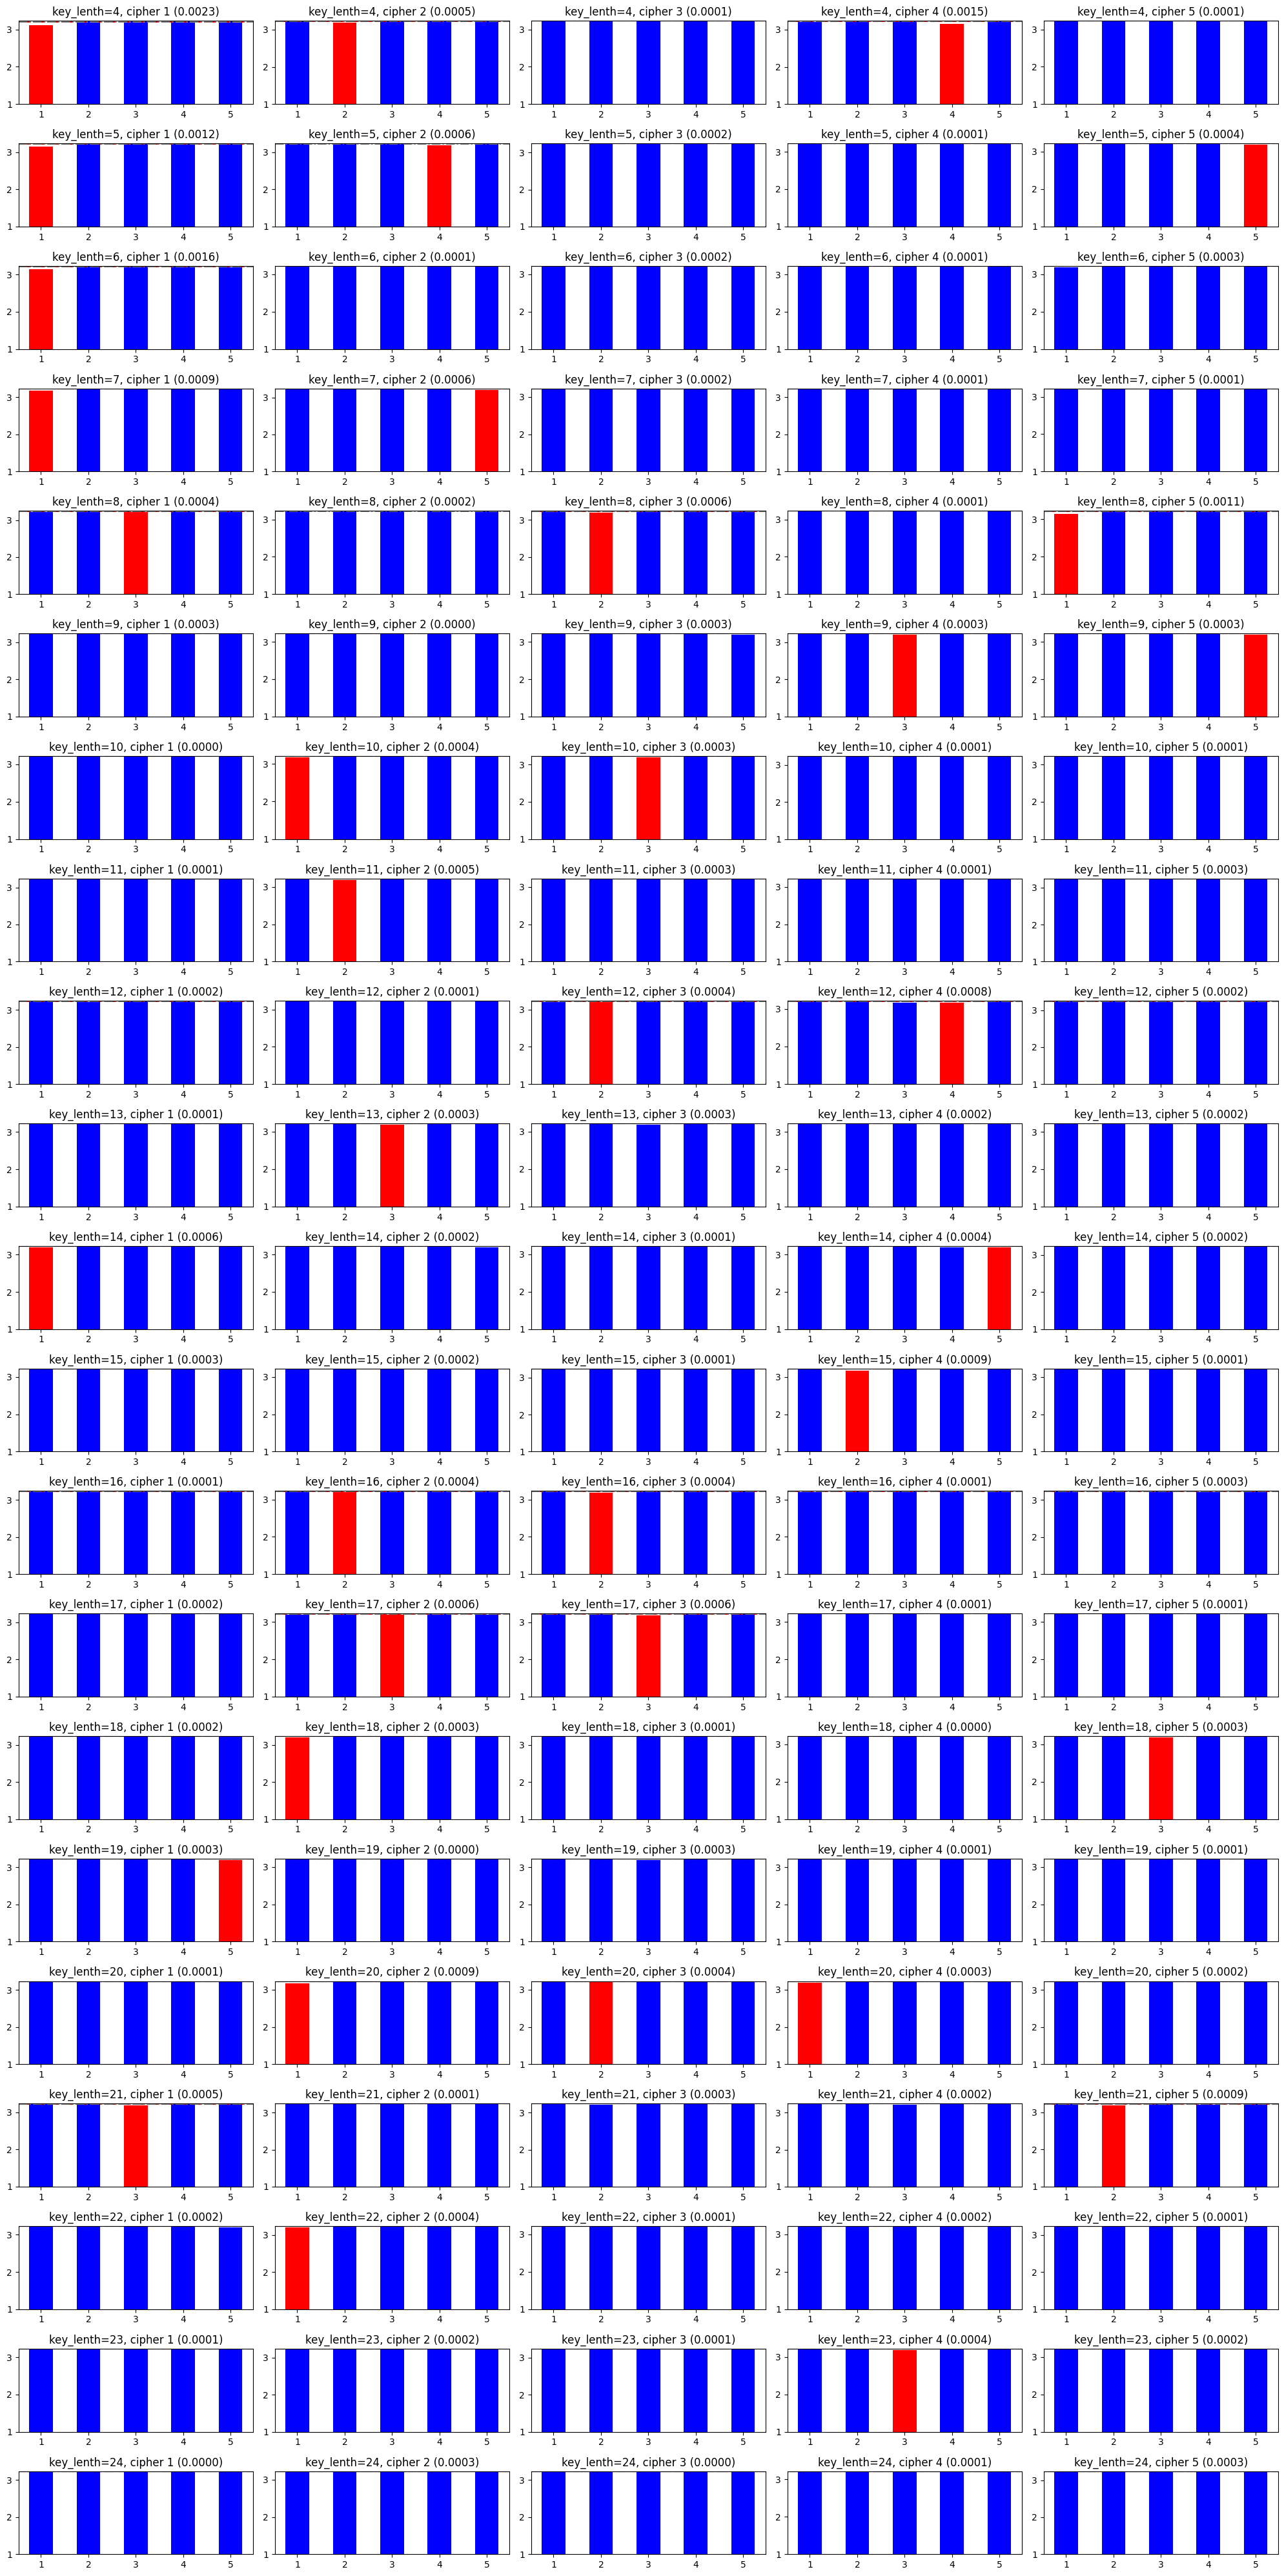

In [173]:
# Entropy Start Point Analysis
# The first 60 characters are used to compute the entropy start point

N = 200
stds = []
threshold = 0.00032

fig, axes = plt.subplots(21, 5, figsize=(20, 40))

working_cases = 0

for key in keys:
    ax_row = axes[key-4]
    for ci, ciphertext in enumerate(ciphers[key], 1):
        ax = ax_row[ci-1]
        
        ax.set_ylim(1.5, 3.25)
        ents = []
        for pi, plaintext in enumerate(plains, 1):
            plain_stream = encode(plaintext[:N])
            cipher_stream = encode(ciphertext[:N])
            diffs = [diff( i_c, i_p ) for i_c, i_p in zip(cipher_stream, plain_stream)]
            diff_counter = Counter(diffs)
            ent = entropy(diff_counter)
            ents.append(ent)

        m_ent = min(ents)
        
    
        ent_avg = sum(ents) / len(ents)
        ent_std = sum((e - ent_avg) ** 2 for e in ents) / len(ents)
        ax.axhline(ent_avg, color='r', linestyle='--', label='avg')
        ax.axhline(ent_avg - 2 * ent_std, color='gray', linestyle='-.', label='-2 std')
        ax.axhline(ent_avg + 2 * ent_std, color='gray', linestyle='-.', label='+2 std')

        
        
        for pi, ent in enumerate(ents, 1):
            if m_ent == ent and ent_std > threshold:
                ax.bar(pi, ent, color='red', width=0.5, label=f'plain_{pi}')
            else:
                ax.bar(pi, ent, color='blue', width=0.5, label=f'plain_{pi}')

        stds.append(ent_std)
        ax.set_ylim(1.0, ent_avg + 10 * ent_std)
        if ent_std > threshold:
            working_cases += 1
        ax.set_title(f'key_lenth={key}, cipher {ci} ({ent_std:.4f})')

print('working', working_cases)
print(sum(stds) / len(stds))
fig.tight_layout()

working 15
0.009961241845313207


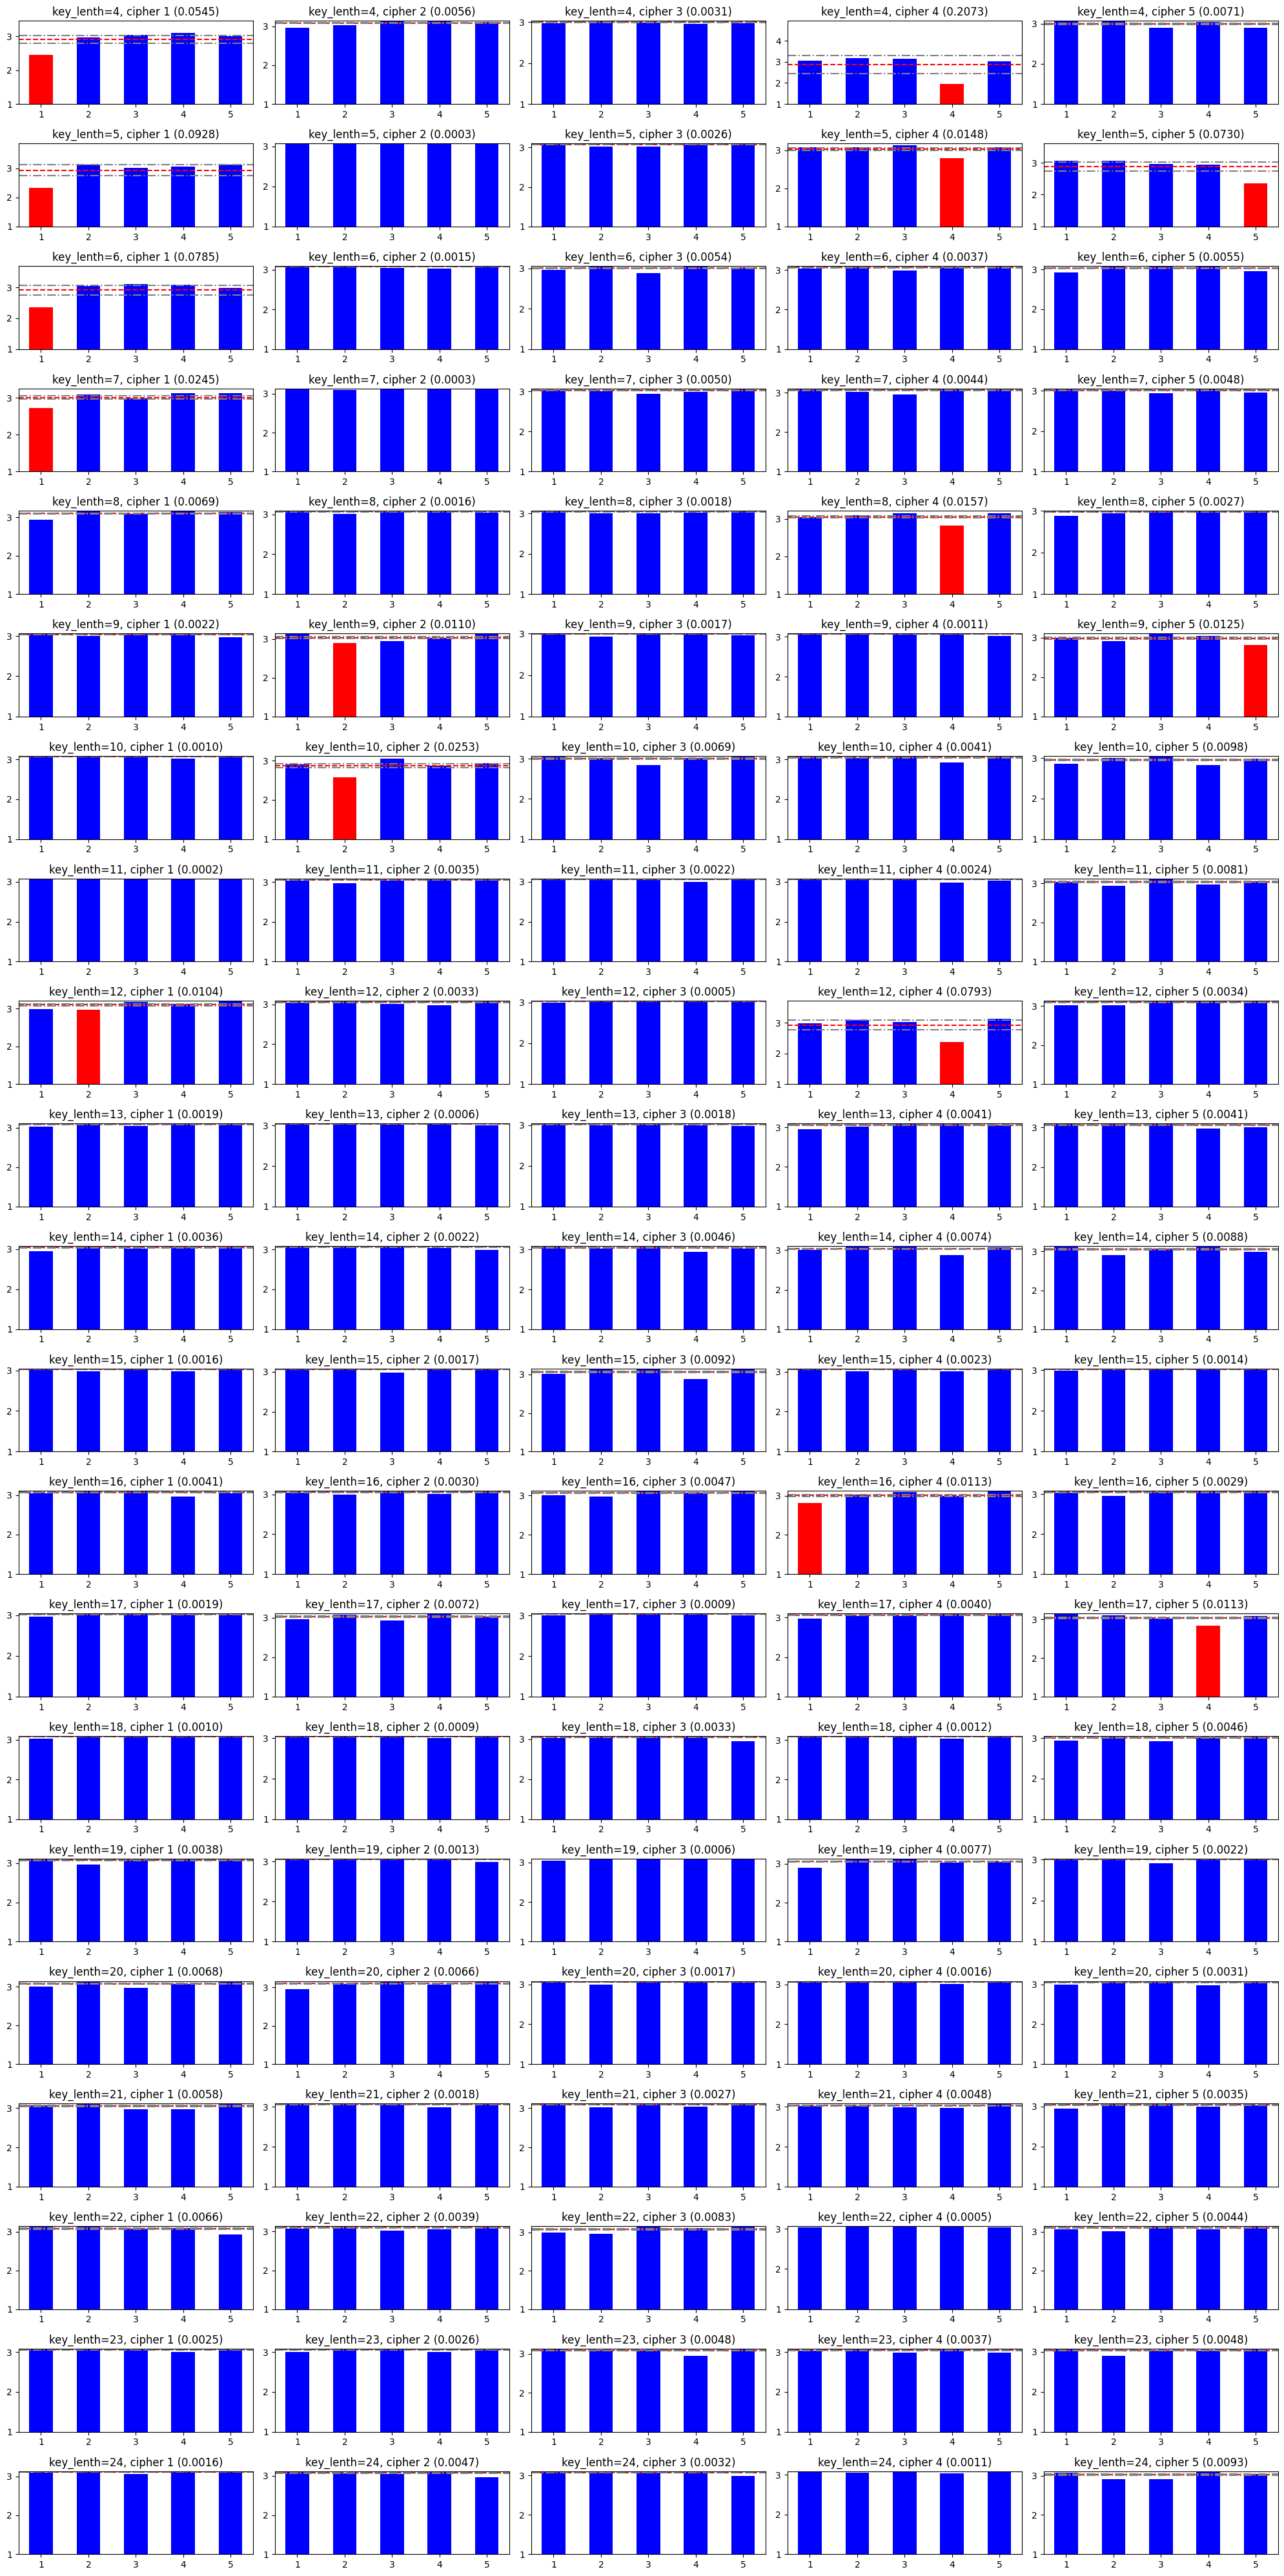

In [162]:
# Entropy Start Point Analysis
# The first 60 characters are used to compute the entropy start point

N = 60
stds = []
threshold = 0.01

fig, axes = plt.subplots(21, 5, figsize=(20, 40))

working_cases = 0

for key in keys:
    ax_row = axes[key-4]
    for ci, ciphertext in enumerate(ciphers[key], 1):
        ax = ax_row[ci-1]
        
        ax.set_ylim(1.5, 3.25)
        ents = []
        for pi, plaintext in enumerate(plains, 1):
            plain_stream = encode(plaintext[:N])
            cipher_stream = encode(ciphertext[:N])
            diffs = [diff( i_c, i_p ) for i_c, i_p in zip(cipher_stream, plain_stream)]
            diff_counter = Counter(diffs)
            ent = entropy(diff_counter)
            ents.append(ent)

        m_ent = min(ents)
        
    
        ent_avg = sum(ents) / len(ents)
        ent_std = sum((e - ent_avg) ** 2 for e in ents) / len(ents)
        ax.axhline(ent_avg, color='r', linestyle='--', label='avg')
        ax.axhline(ent_avg - 2 * ent_std, color='gray', linestyle='-.', label='-2 std')
        ax.axhline(ent_avg + 2 * ent_std, color='gray', linestyle='-.', label='+2 std')

        
        
        for pi, ent in enumerate(ents, 1):
            if m_ent == ent and ent_std > threshold:
                ax.bar(pi, ent, color='red', width=0.5, label=f'plain_{pi}')
            else:
                ax.bar(pi, ent, color='blue', width=0.5, label=f'plain_{pi}')

        stds.append(ent_std)
        ax.set_ylim(1.0, ent_avg + 10 * ent_std)
        if ent_std > threshold:
            working_cases += 1
        ax.set_title(f'key_lenth={key}, cipher {ci} ({ent_std:.4f})')

print('working', working_cases)
print(sum(stds) / len(stds))
fig.tight_layout()

working 12
0.02069612969243035


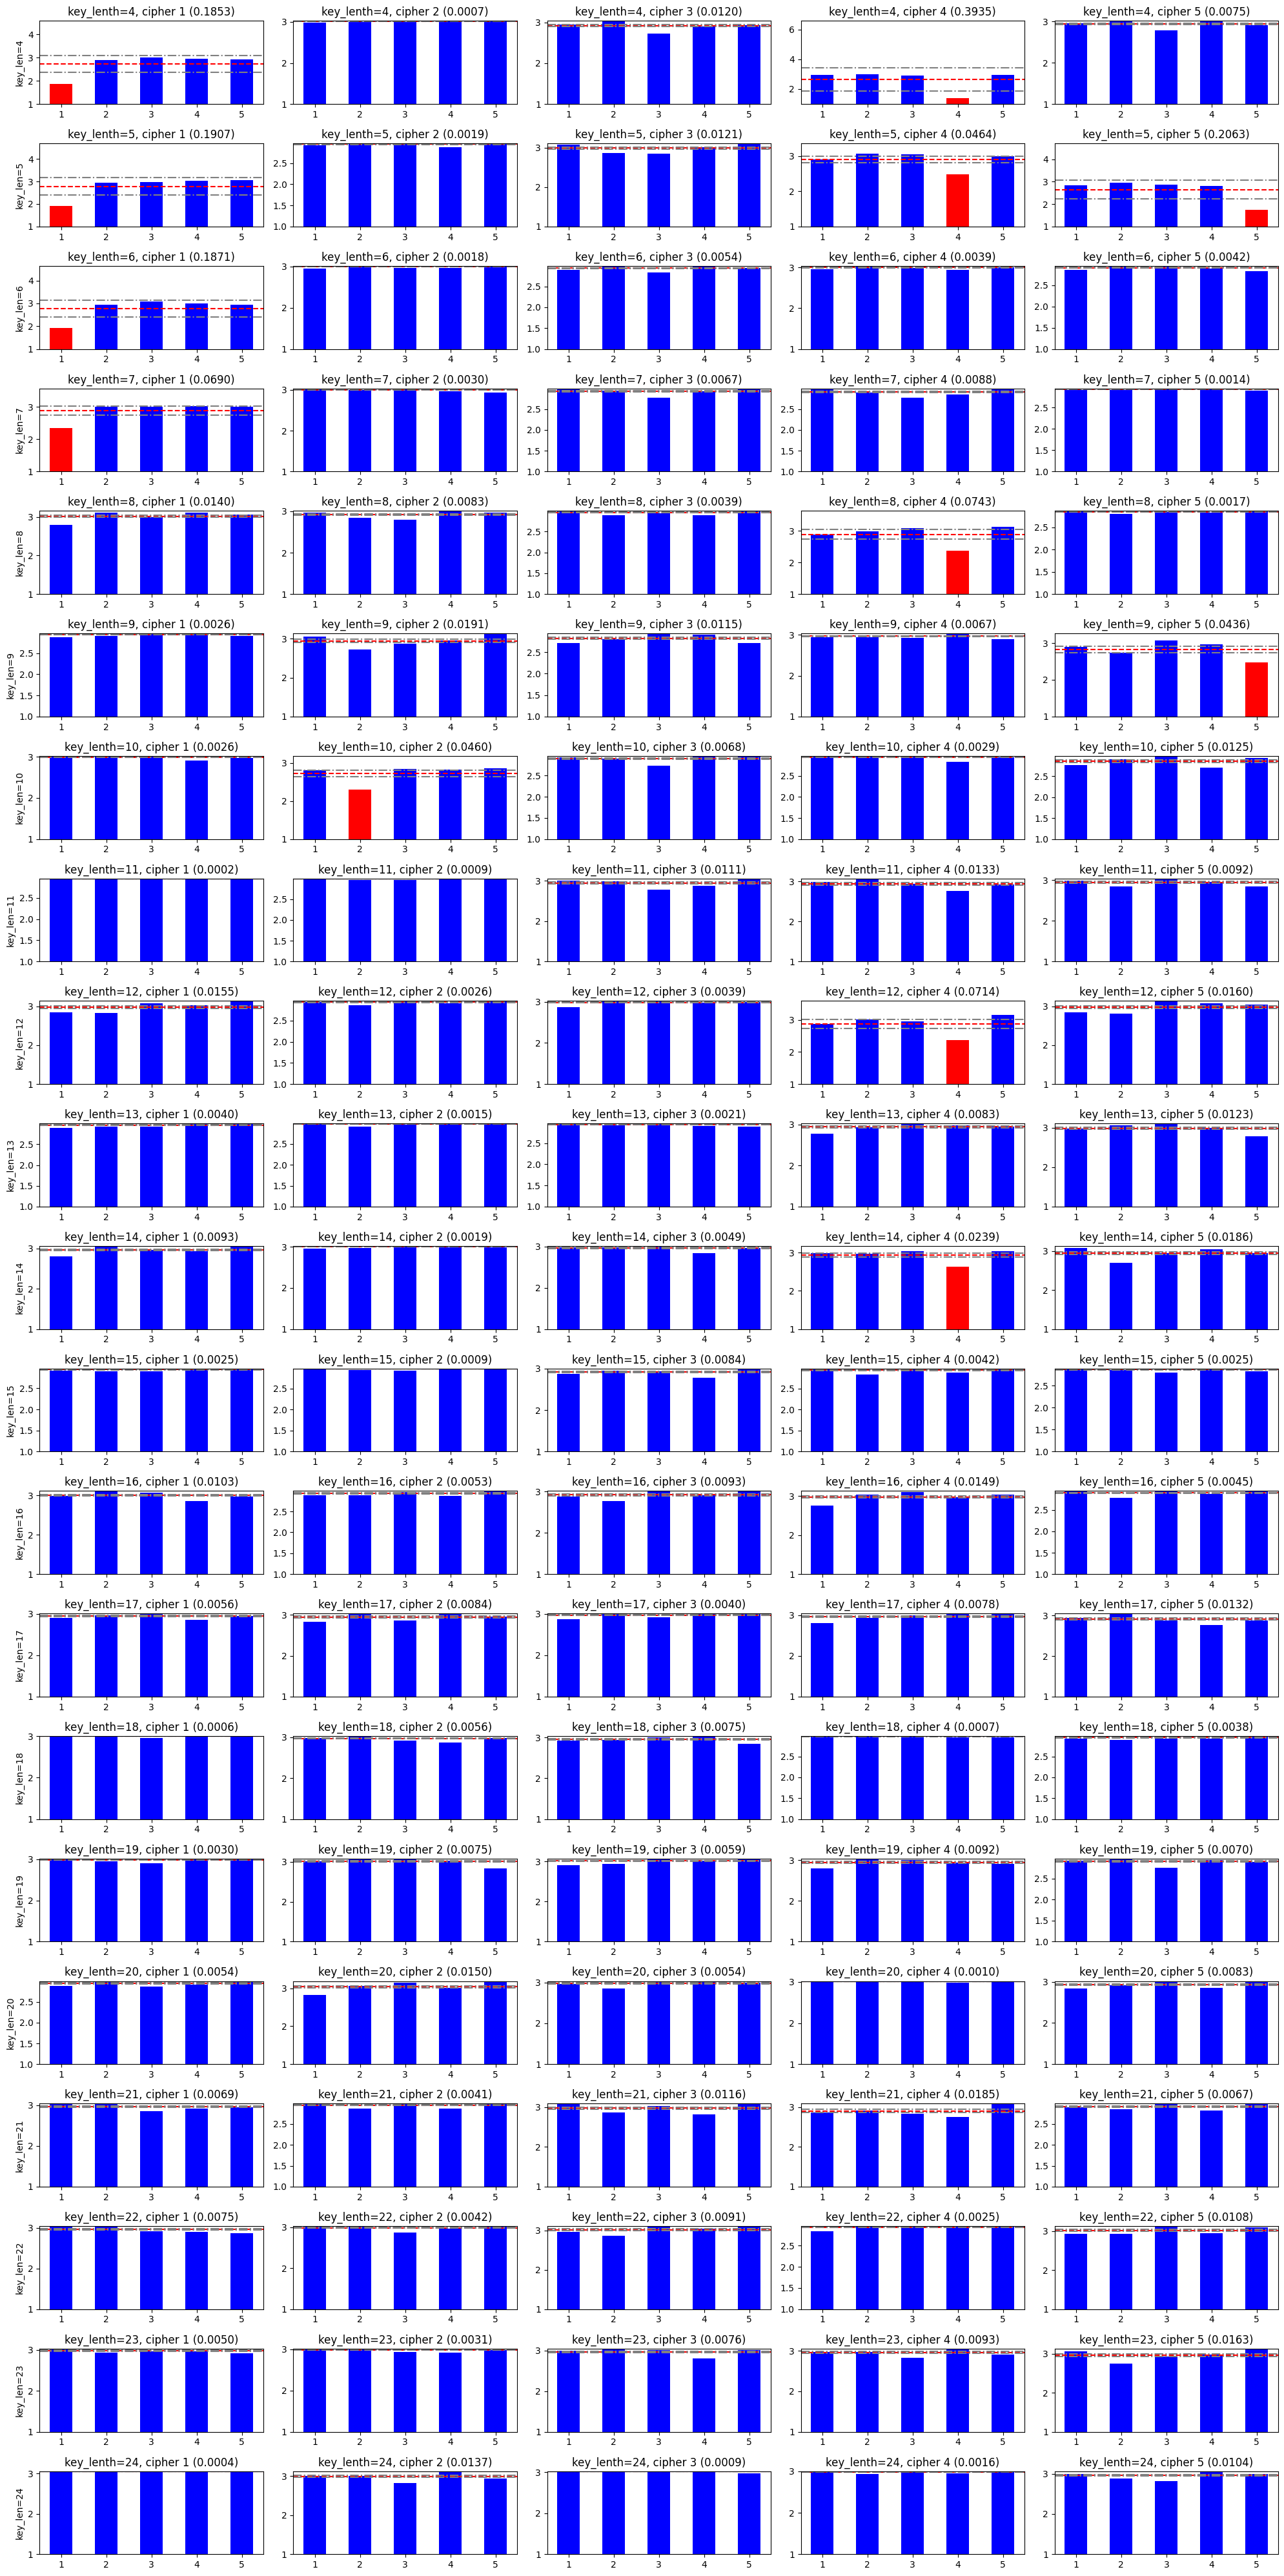

In [175]:
# Entropy Start Point Analysis
# The first 60 characters are used to compute the entropy start point

N = 45
stds = []
threshold = 0.02

fig, axes = plt.subplots(21, 5, figsize=(20, 40))

working_cases = 0

for key in keys:
    ax_row = axes[key-4]
    ax_row[0].set_ylabel(f'key_len={key}')
    for ci, ciphertext in enumerate(ciphers[key], 1):
        ax = ax_row[ci-1]
        
        ax.set_ylim(1.5, 3.25)
        ents = []
        for pi, plaintext in enumerate(plains, 1):
            plain_stream = encode(plaintext[:N])
            cipher_stream = encode(ciphertext[:N])
            diffs = [diff( i_c, i_p ) for i_c, i_p in zip(cipher_stream, plain_stream)]
            diff_counter = Counter(diffs)
            ent = entropy(diff_counter)
            ents.append(ent)

        m_ent = min(ents)
        
    
        ent_avg = sum(ents) / len(ents)
        ent_std = sum((e - ent_avg) ** 2 for e in ents) / len(ents)
        ax.axhline(ent_avg, color='r', linestyle='--', label='avg')
        ax.axhline(ent_avg - 2 * ent_std, color='gray', linestyle='-.', label='-2 std')
        ax.axhline(ent_avg + 2 * ent_std, color='gray', linestyle='-.', label='+2 std')

        
        
        for pi, ent in enumerate(ents, 1):
            if m_ent == ent and ent_std > threshold:
                ax.bar(pi, ent, color='red', width=0.5, label=f'plain_{pi}')
            else:
                ax.bar(pi, ent, color='blue', width=0.5, label=f'plain_{pi}')

        stds.append(ent_std)
        ax.set_ylim(1.0, ent_avg + 10 * ent_std)
        if ent_std > threshold:
            working_cases += 1
        ax.set_title(f'key_lenth={key}, cipher {ci} ({ent_std:.4f})')

print('working', working_cases)
print(sum(stds) / len(stds))
fig.tight_layout()

working 17
0.031045580561664347


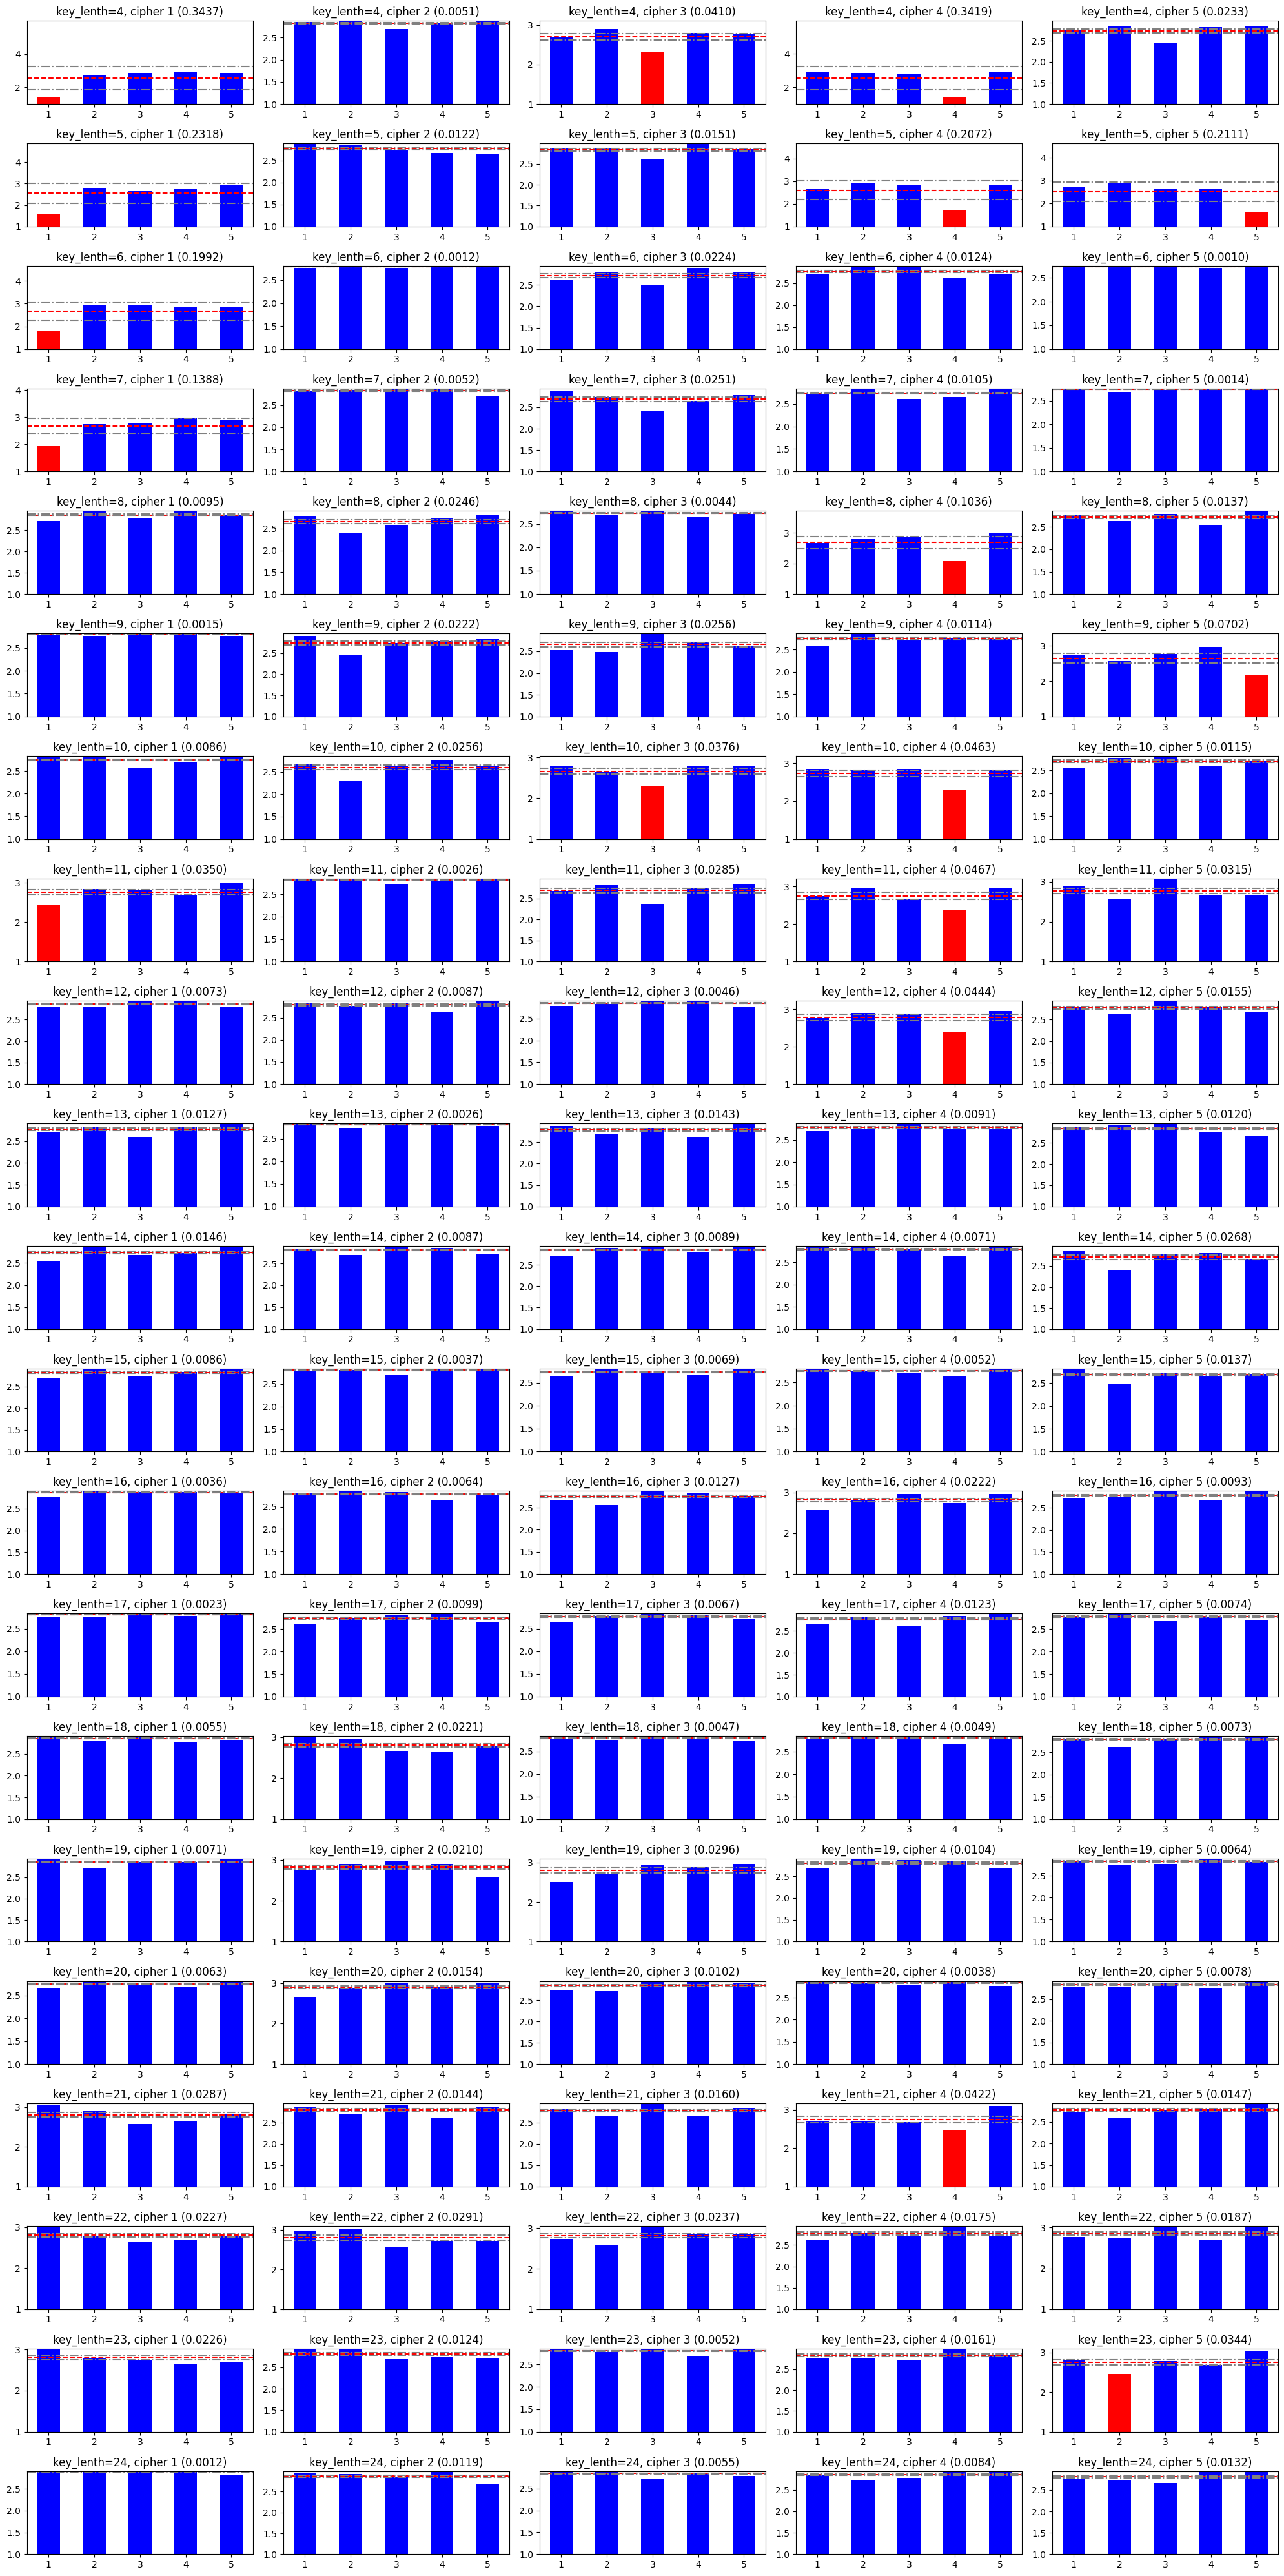

In [156]:
# Entropy Start Point Analysis
# The first 60 characters are used to compute the entropy start point

N = 30
stds = []
threshold = 0.034

fig, axes = plt.subplots(21, 5, figsize=(20, 40))

working_cases = 0

for key in keys:
    ax_row = axes[key-4]
    for ci, ciphertext in enumerate(ciphers[key], 1):
        ax = ax_row[ci-1]
        
        ax.set_ylim(1.5, 3.25)
        ents = []
        for pi, plaintext in enumerate(plains, 1):
            plain_stream = encode(plaintext[:N])
            cipher_stream = encode(ciphertext[:N])
            diffs = [diff( i_c, i_p ) for i_c, i_p in zip(cipher_stream, plain_stream)]
            diff_counter = Counter(diffs)
            ent = entropy(diff_counter)
            ents.append(ent)

        m_ent = min(ents)
        
    
        ent_avg = sum(ents) / len(ents)
        ent_std = sum((e - ent_avg) ** 2 for e in ents) / len(ents)
        ax.axhline(ent_avg, color='r', linestyle='--', label='avg')
        ax.axhline(ent_avg - 2 * ent_std, color='gray', linestyle='-.', label='-2 std')
        ax.axhline(ent_avg + 2 * ent_std, color='gray', linestyle='-.', label='+2 std')

        
        
        for pi, ent in enumerate(ents, 1):
            if m_ent == ent and ent_std > threshold:
                ax.bar(pi, ent, color='red', width=0.5, label=f'plain_{pi}')
            else:
                ax.bar(pi, ent, color='blue', width=0.5, label=f'plain_{pi}')

        stds.append(ent_std)
        ax.set_ylim(1.0, ent_avg + 10 * ent_std)
        if ent_std > threshold:
            working_cases += 1
        ax.set_title(f'key_lenth={key}, cipher {ci} ({ent_std:.4f})')

print('working', working_cases)
print(sum(stds) / len(stds))
fig.tight_layout()

In [43]:
def progressing_entropy_analysis(ciphertext, plaintext, search_space=SEARCH_SPACE):
    X, Y = [], []
    for step in range(search_space, search_space * 3):
        plain_stream = encode(plaintext[:step]) 
        cipher_stream = encode(ciphertext[:step])
        diffs = [diff( i_c, i_p ) for i_c, i_p in zip(cipher_stream, plain_stream)]
        diff_counter = Counter(diffs)
        ent = entropy(diff_counter)
        X.append(step)
        Y.append(ent)

    return X, Y

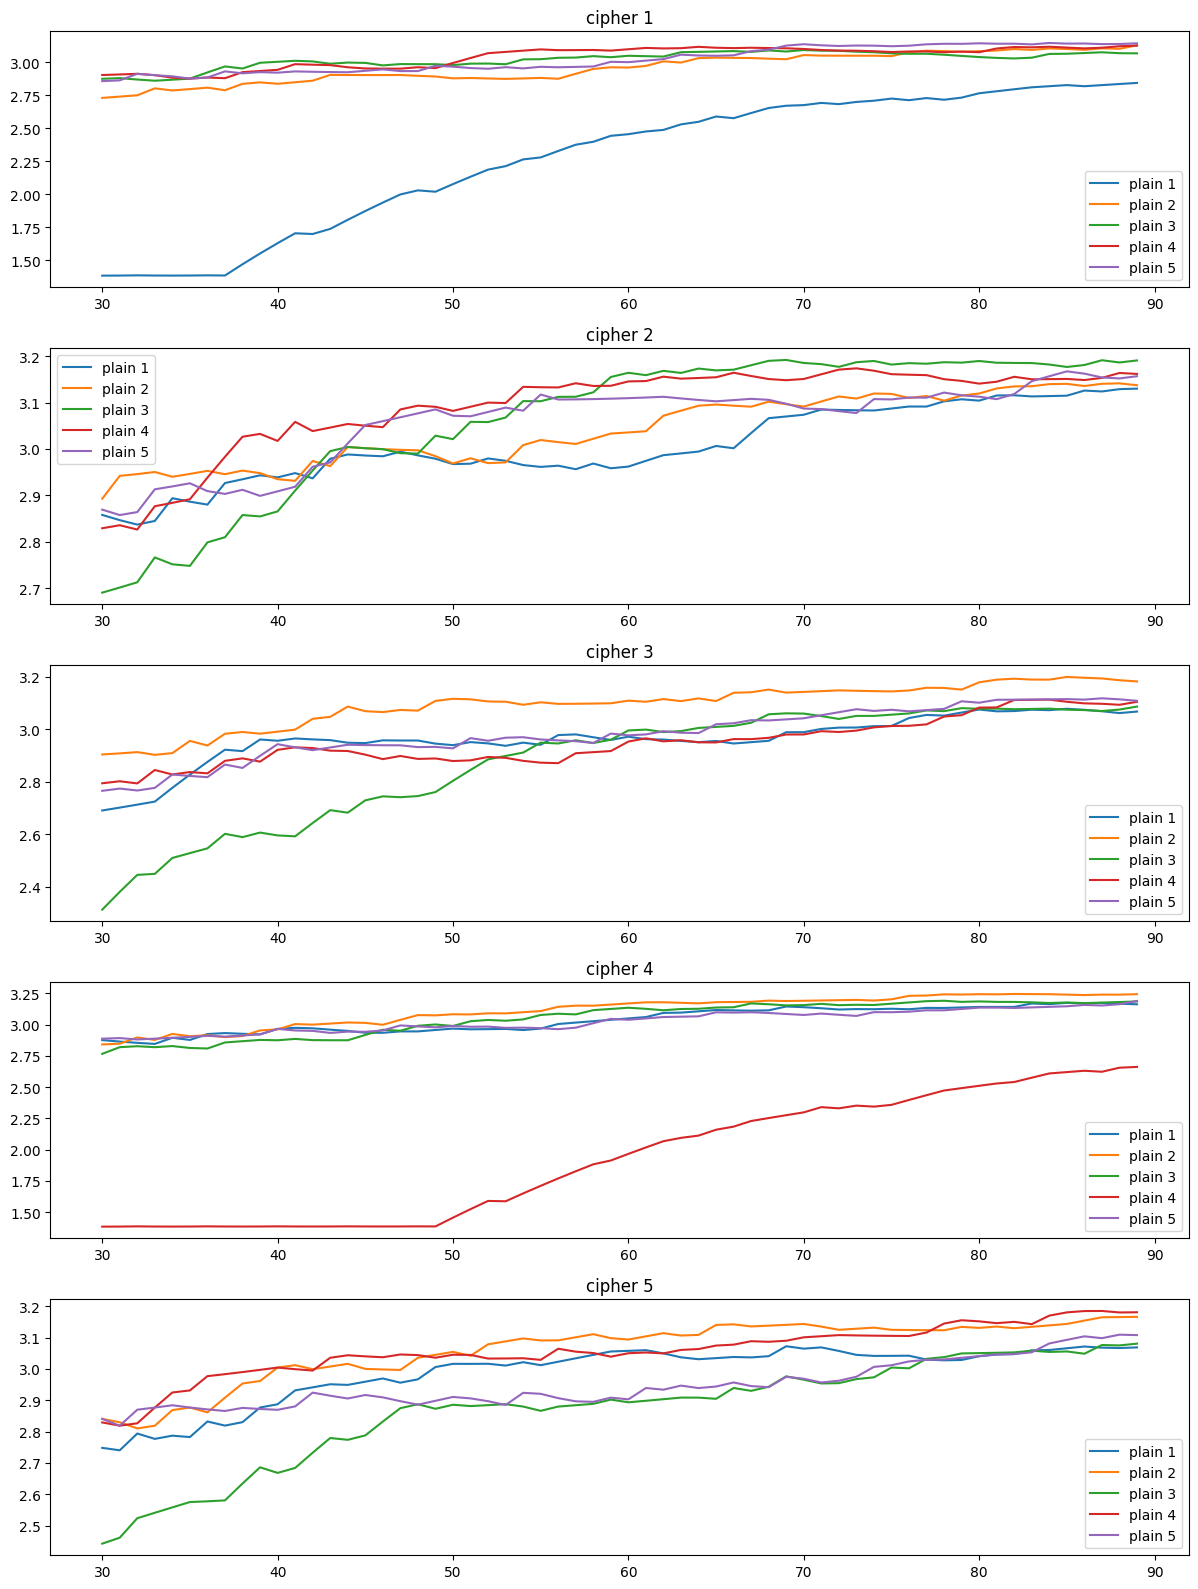

In [46]:
fig, ax_matrix = plt.subplots(5, 1, figsize=(12, 16))

for i in range(5):
    for j in range(5):
        X, Y = progressing_entropy_analysis(ciphers[4][i], plains[j], search_space=30)
        ax_matrix[i].plot(X, Y, label=f'plain {j+1}')
        ax_matrix[i].legend()
        ax_matrix[i].set_title(f'cipher {i+1}')

fig.tight_layout()

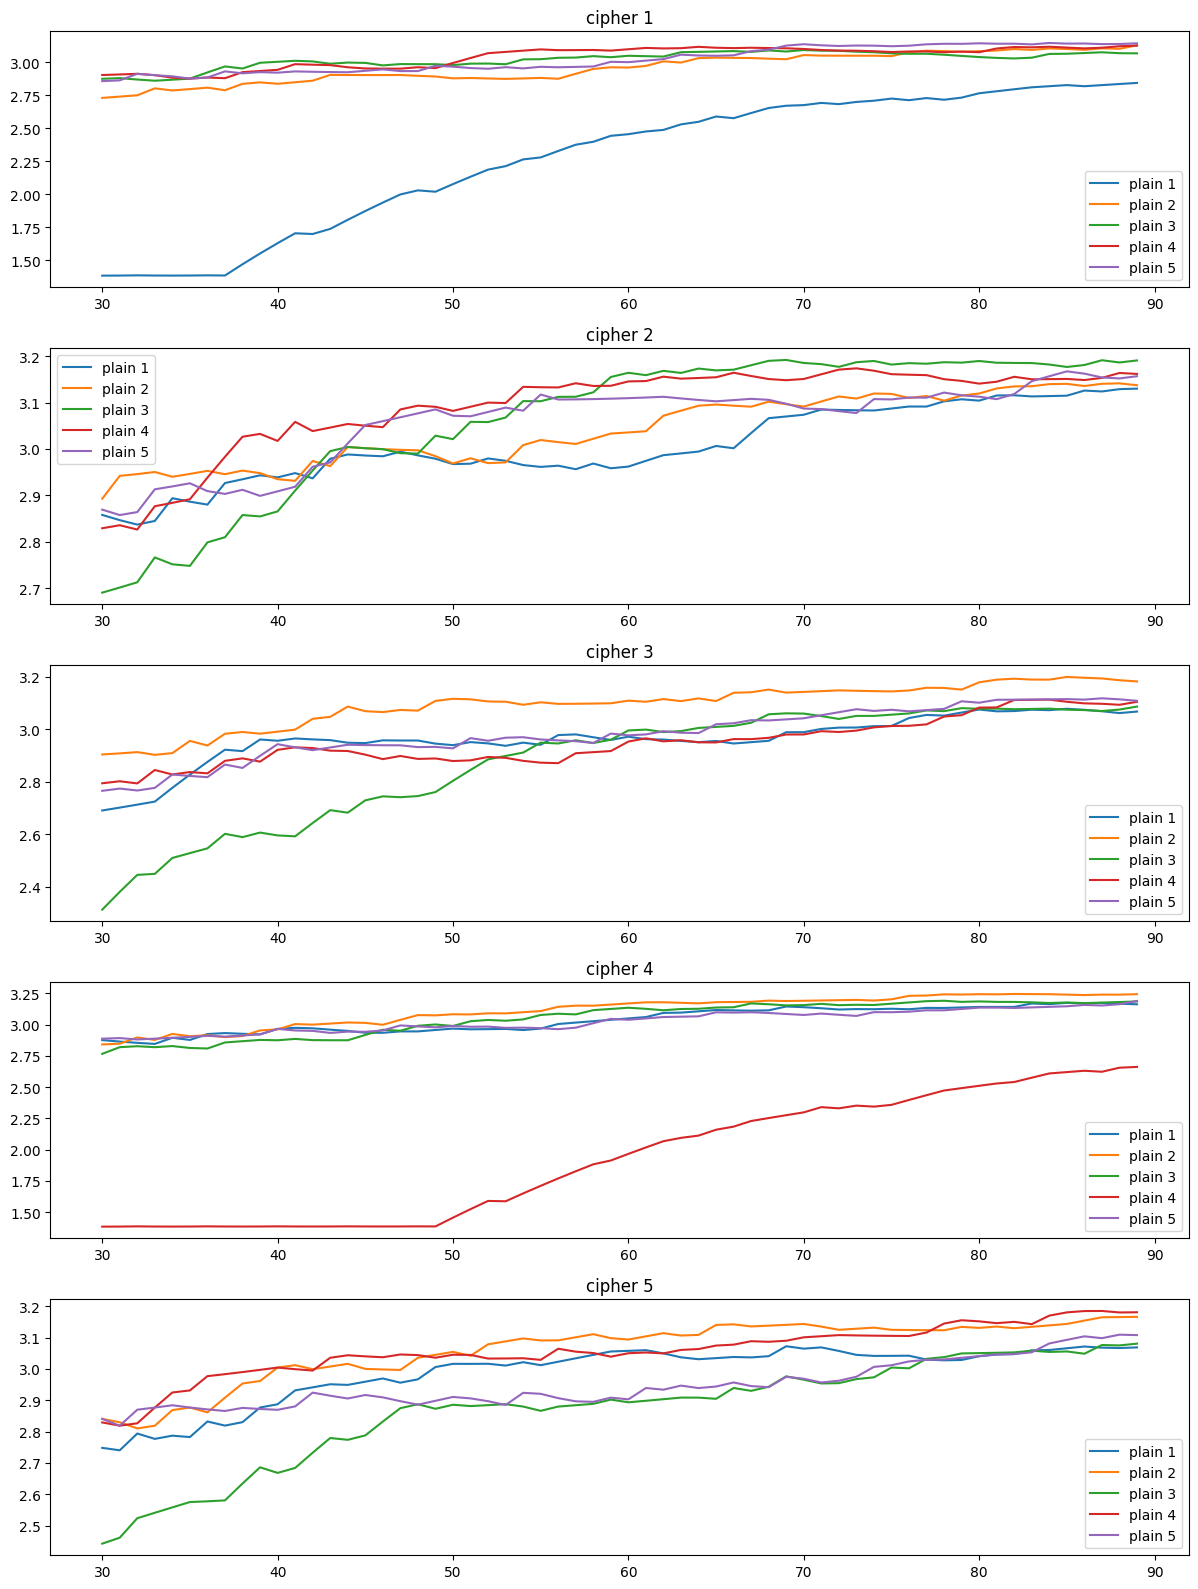

In [47]:
fig, ax_matrix = plt.subplots(5, 1, figsize=(12, 16))

for i in range(5):
    for j in range(5):
        X, Y = progressing_entropy_analysis(ciphers[4][i], plains[j], search_space=30)
        ax_matrix[i].plot(X, Y, label=f'plain {j+1}')
        ax_matrix[i].legend()
        ax_matrix[i].set_title(f'cipher {i+1}')

fig.tight_layout()

In [14]:
def measure_trend_diff(pa, pb):
    return sum((a - b) ** 2 for a, b in zip(pa, pb))

def compare_trend(a, b):
    return sum((a - b) for a, b in zip(a, b))

In [440]:
data = [2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1]
cntr = Counter(data)
print(entropy(cntr))
data += [2,3,4,10]
cntr = Counter(data)
print(entropy(cntr))

1.3862943611198906
1.5113949670044375


In [475]:
def cipher_removed_at(ciphertext, i):
    return ciphertext[:i] + ciphertext[i+1:]

def print_list(list):
    for i in list:
        print('%02d' % i, end=' ')
    print()
        

# Optimize the input ciphertext to match the plaintext,
# using entropy change within the searchspace
# Return the optimized ciphertext
def optimize_ciphertexts(ciphertext, plaintext, n, debug=False, _ci = 0, search_space=30, ax=None):
    if n == 0:
        return ciphertext

    cipher_stream = encode(ciphertext[:search_space])
    plain_stream = encode(plaintext[:search_space])
    diffs = [diff(i_c, i_p) for i_c, i_p in zip(cipher_stream, plain_stream)]
    start_ent = entropy(Counter(diffs))
    if debug:
        print('start_ent', start_ent)
    prev_ent = start_ent
    ci = _ci
    ents = []
    de_list = [] # delta(entropy)
    while ci < search_space:
        new_ciphertext = cipher_removed_at(ciphertext, ci)
        new_cipher_stream = encode(new_ciphertext[:search_space])
        plain_stream = encode(plaintext[:search_space])
        diffs = [diff(i_c, i_p) for i_c, i_p in zip(new_cipher_stream, plain_stream)]
        cntr = Counter(diffs)
        ent = entropy(cntr)
        ents.append(ent)
        de_list.append((ent - prev_ent) / prev_ent * 100)
        if debug:
            print(f'{ci} {(ent - prev_ent) / prev_ent * 100 : .5f} {ent} ({len(cntr)})')


        #     ciphertext = cipher_removed_at(ciphertext, ci - 1)
        #     new_cipher_stream = encode(ciphertext[:search_space])
        #     diffs = [diff(i_c, i_p) for i_c, i_p in zip(new_cipher_stream, plain_stream)]
        #     prev_ent = entropy(Counter(diffs))
        #     if debug:
        #         print_list(range(search_space))
        #         print_list(new_cipher_stream)
        #         print_list(plain_stream)
        #         print_list(diffs)
        #         print('removed', ci - 1, prev_ent)

        #     break
        ci += 1
        prev_ent = ent

    if ax:
        ax.plot(range(search_space), de_list)
        # ax.bar(range(search_space), de_list, width=0.3)
        ax.bar(range(search_space), ents, width=0.5)
        ax.plot(range(search_space), ents)
        ax.axhline(0, linestyle='--', color='gray')

    return optimize_ciphertexts(ciphertext, plaintext, n-1, debug=debug, _ci = ci, search_space=search_space)

00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
06 08 18 22 11 16 06 13 02 22 12 13 19 15 02 06 12 19 17 14 17 05 25 00 03 13 14 18 19 08 
04 05 14 21 14 03 09 01 20 09 15 14 00 03 08 18 15 14 01 24 25 00 09 13 16 05 18 09 12 13 
02 03 04 01 24 13 24 12 09 13 24 26 19 12 21 15 24 05 16 17 19 05 16 14 14 08 23 09 07 22 
start_ent 2.8928894492515282
0 -0.21138 2.886774446912403 (20)
1  0.00000 2.886774446912403 (20)
2 -0.99655 2.858006239667225 (20)
3 -2.22713 2.7943548228377435 (19)
4  0.00000 2.7943548228377435 (19)
5  0.62417 2.8117964276298952 (19)
6  1.02313 2.840564634875073 (19)
7  0.00000 2.840564634875073 (19)
8  1.62678 2.886774446912403 (20)
9  0.00000 2.886774446912403 (20)
10  0.00000 2.886774446912403 (20)
11 -0.39236 2.8754478444593765 (20)
12 -1.60705 2.829238032422047 (19)
13  0.00000 2.829238032422047 (19)
14  0.00000 2.829238032422047 (19)
15  0.00000 2.829238032422047 (19)
16  1.63330 2.8754478444593765 (20)
17 -1.29338 2.838

'fhrvkpfmbvlmsobflsqnqey cmnrshwvjnpiovwcmoexvsggdegivpuwiebsvpvhguqueufgvddqpqjivwifohrathjscfxptadocugjuvytbehvjfoisuc fcewlfutfsdcmvdpefpvflrhbrvdjhguqpbauarrdqpwadhen csqvlgprxtjnoes cedexpuwueukrraufsvvlrhbkibfvxsqqkavrwaqibsvferrtelsvuc fdgnhb cvfkflaudhenhvaohvdgum gvdtcxgfrdrladljpngdsgjisogueuogcgikwdsgymfydfmgcibulrfuvdctdcffcituhrukdpm cmenhvafhtfpgecnhdqthhjedfmgcppedpfkucvffhhjedxffcigpyemsfcowgwgiggddqqjvulrchnadbkuhsqsgwafuihilisbsvjxlpfihwavhqqvhivacqefwtrffuckmkvxfpshhaudvuqumabnchjuwvvuwjvnqitudctbrlpmcubawjltbsvpewzsskqkafxtmg iebsmucvdutdmuqusvuobawqpjikxffcugs sxpiueqjhvaqgbtuhbtbpiucpisbhmujhvaohpjqueu'

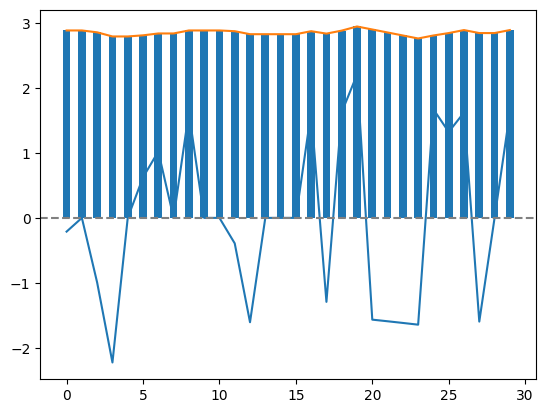

In [476]:
# start_ent > ent after 0-removed
cipher_stream = encode(ciphers[4][1][:30])
plain_stream = encode(plains[1][:30])
diffs = [diff(i_c, i_p) for i_c, i_p in zip(cipher_stream, plain_stream)]

print_list(range(30))
print_list(cipher_stream)
print_list(plain_stream)
print_list(diffs)

correct=4


# 3%?

# find the first local minimum
fig, ax = plt.subplots()
optimize_ciphertexts(ciphers[4][1], plains[1], 1, ax=ax, debug=True)

00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 
20 21 06 12 14 07 08 22 10 16 10 04 14 10 16 22 24 10 22 24 
19 03 08 13 05 05 18 09 14 07 00 09 14 19 20 09 20 21 20 15 
01 18 25 26 09 02 17 13 23 09 10 22 00 18 23 13 04 16 02 09 
2.5536815580297962
start_ent 2.8405646348750735
0 -9.14668 2.580747367443247 (16)
1 -0.32635 2.5723249828027233 (16)
2  2.47447 2.6359763996322045 (17)
3  1.09137 2.664744606877383 (17)
4  3.12977 2.748145010800414 (18)
5  0.00000 2.748145010800414 (18)
6 -0.63467 2.7307034060082622 (18)
7  0.63872 2.748145010800414 (18)
8  1.04682 2.776913218045592 (18)
9  0.62809 2.794354822837744 (18)
10 -2.68320 2.719376803555236 (17)
11  1.69928 2.7655866155925657 (18)
12 -1.67089 2.719376803555236 (17)
13  1.69928 2.7655866155925657 (18)
14 -1.67089 2.719376803555236 (17)
15  0.00000 2.719376803555236 (17)
16 -2.34066 2.655725386725755 (16)
17  0.00000 2.655725386725755 (16)
18  2.39676 2.7193768035552357 (17)
19  0.00000 2.719376803555236 (17)
20  0.00000 

'tuflnghvjpjdnjpvxjvxxptclbkuppenwaudpsiffhvaerqqqvvisuckhscpzkeukfwagaiiqoitbsvpiuitulzfuclfcgqzbuwisbdxutdgucqxauxfkwjeuqudqggheqmgubaxlkjnzcvhpiimhjwwarlazkvlaerqgquxtbdvfvhwadui xcjiahhpjplxjgvdtcoisqrqtzbuinkqmtehrubbkisodtiktrulhjupdtkpymvdrfqxwaussofdmduclb isrsmcesorvzbuigcvuljqqmoicfbvwiskqkafdvokqkavdxtqgudqcqgbmhhawqeghhguggdugoiwkh ftcqvuvmogvwarrpmdrslbvmfxhhathgmkqitbuitvdqqbfsliqvlag gmwgitbksvngomftcgpcfxtobuigcvljqqiebosjvhvftctsqvtfewmwgobagqgpwuehguwadlkhgvxardwnuguwaorhftqmu ckpzxhvoqufwikswaeuytvhhadexxuqqiebzemnseqxguiebhrborvtbvyqguzjudpaphvwkobaigusbplrhbgymtgpfpfaddqpwqvplsobhqcqvsnkqkavdxunhwavxvccqw'

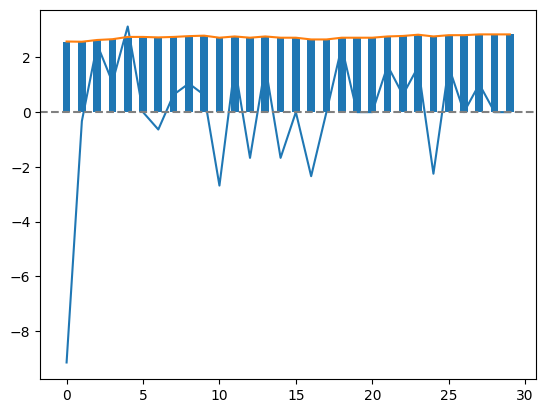

In [477]:
# start_ent > ent after 0-removed

cipher_stream = encode(ciphers[4][4][:20])
plain_stream = encode(plains[4][:20])
diffs = [diff(i_c, i_p) for i_c, i_p in zip(cipher_stream, plain_stream)]

print_list(range(20))
print_list(cipher_stream)
print_list(plain_stream)
print_list(diffs)
print(entropy(Counter(diffs)))

correct=0

# find the first local minimum
fig, ax = plt.subplots()
optimize_ciphertexts(ciphers[4][4], plains[4], 1, ax=ax, debug=True)

00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
07 09 19 22 16 02 06 13 06 21 11 18 18 05 04 10 21 19 16 19 02 26 01 04 14 14 18 08 22 14 
04 05 14 21 14 03 09 01 20 09 15 14 00 03 08 18 15 14 01 24 25 00 09 13 16 05 18 09 12 13 
03 04 05 01 02 26 24 12 13 12 23 04 18 02 23 19 06 05 15 22 04 26 19 18 25 09 00 26 10 01 
2.858006239667225
start_ent 2.858006239667225
0 -14.23612 2.4511371514828864 (14)
1  0.00000 2.4511371514828864 (14)
2 -3.05891 2.3761591322003786 (13)
3 -3.15543 2.3011811129178703 (12)
4 -1.90782 2.2572786831819394 (12)
5 -3.69473 2.173878279258908 (11)
6  3.44904 2.2488562985414156 (12)
7  3.33405 2.3238343178239234 (13)
8  3.22648 2.398812337106431 (14)
9  1.10308 2.425273162050211 (14)
10  1.53346 2.4624637539359124 (14)
11  2.58487 2.5261151707653937 (15)
12  0.00000 2.5261151707653937 (15)
13  0.69045 2.543556775557545 (15)
14  0.00000 2.543556775557545 (15)
15  1.46215 2.580747367443247 (15)
16  1.79056 2.626957179480576

'gisvpbfmfukrredjuspsbzadnnrhvnmohryakqgzsthheegivttvhheqtrxjdvkrvfugvdhpopmyughqjobuikscfxts crfselwxvucfwjfoiwtbzifujhvhpenwepefpzekqlkeptfljdvrqcfauarhpovdgfcpbeprwmhprxtnmndvcacfgzcmcvxvfukrreteryyjpjdmfcgwysqqlkieuqvleqthgtoufmtvuc jfmgecathmnhibveienhvengugjskbixaudyhfrdxreckisqebuilfphvfugcgmjvcrvjwkh fcnhdjvbulrjtucfwbahchefuvisukdpqzblhqftchjqegqhfcnhdusggmhbdojiemqfeqfucvjeggmhbvhhedqzfnsfco fvfljebfssgwvmshnadfjtgvtquchwfijimjsbsvnwkoilfucxjnrwiwacqejsqeixaiomxugqihiaudvyptleqaflwyswv xkvnqixtbseujznoewzbxkbmtbsvqtdvrvnoichzqnhajebsmybucxwbkwswepwvpcawqpnhjwiiaeubuuqjvfqjhvepfawxf vdirfvdqjsbhmyigudrfnlswbv'

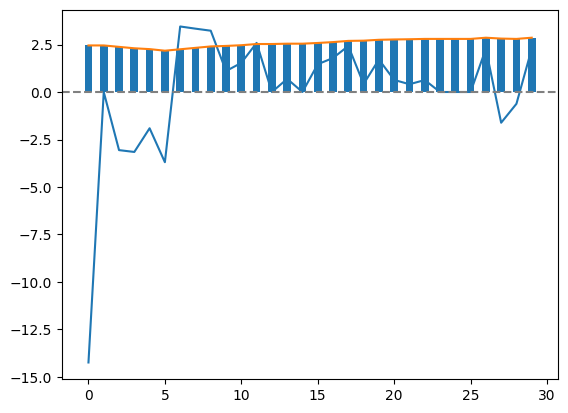

In [478]:
# start_ent > ent after 0-removed
cipher_stream = encode(ciphers[5][1][:30])
plain_stream = encode(plains[1][:30])
diffs = [diff(i_c, i_p) for i_c, i_p in zip(cipher_stream, plain_stream)]

print_list(range(30))
print_list(cipher_stream)
print_list(plain_stream)
print_list(diffs)
print(entropy(Counter(diffs)))

correct=5

# find the first local minimum
fig, ax = plt.subplots()
optimize_ciphertexts(ciphers[5][1], plains[1], 1, ax=ax, debug=True)

00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
21 20 08 18 08 08 06 06 03 00 14 03 12 07 21 00 16 20 18 12 20 02 04 18 22 14 05 15 22 04 
20 18 05 14 03 08 05 04 00 23 09 03 11 05 18 23 15 18 11 00 15 18 09 05 14 20 01 20 09 15 
01 02 03 04 05 00 01 02 03 04 05 00 01 02 03 04 01 02 07 12 05 11 22 13 08 21 04 22 13 16 
2.4883277433685875
start_ent 2.4883277433685875
0  8.83013 2.7080502011022096 (17)
1  0.41826 2.719376803555236 (17)
2  0.00000 2.719376803555236 (17)
3  1.69928 2.7655866155925657 (18)
4  1.67089 2.8117964276298957 (19)
5  0.00000 2.8117964276298957 (19)
6 -2.66655 2.736818408347388 (18)
7  0.00000 2.736818408347388 (18)
8 -2.32574 2.6731669915179066 (17)
9  1.07618 2.7019351987630844 (17)
10 -1.71025 2.6557253867257544 (16)
11 -2.39676 2.5920739698962736 (15)
12  0.00000 2.5920739698962736 (15)
13 -2.89259 2.517095950613766 (14)
14 -2.97875 2.4421179313312584 (13)
15  0.00000 2.4421179313312584 (13)
16 -0.71420 2.4246763265391

'uthrhhffc nclgu ptrltbdrvneovdxnoobfesdjwfqixsfucrjttbrtflfufmwsgarkewyozhwerferqueoulzj jpfsretbvltetbsswcjphduusuxiebmcefvjriffcmwrjvdfqeaddpqeuuckwacdhhesd wlnnhbrwhimnr kwanbgixpcpvvdiitcuvfyjpjdhuskxryxetvcgwaqrmliw gtlisdkjpjdaiokqkeczrkiw djpvygmj uvm eaqfifnjfrcftwmgjwevpkgiw sgfstkardvtcikd petsqsdlrbxlhqyaxrqntjpjdmustdbefskhrieebxrhoovhwyacnhdxiuwdxj gvgqdh ydnhgfrtbjeisaodgwondqvqx ejaesaaqyiwrvpvdnqmqqomyeagxvtpfqbfbsidcodoeophxetvorvenpfngbecbpwii dndvnoobrtnnftcmscvtumsgamqsgbffctqaogosfdaohfktwihnbgioedvlrl dcptnlzbgbiiidcwmtnbncmsvbnxeglqfbsvfedqfix dqdpjsdgqgj eekcefzkadxwylfucjqazbdgziukhwecfpwmreuguwel'

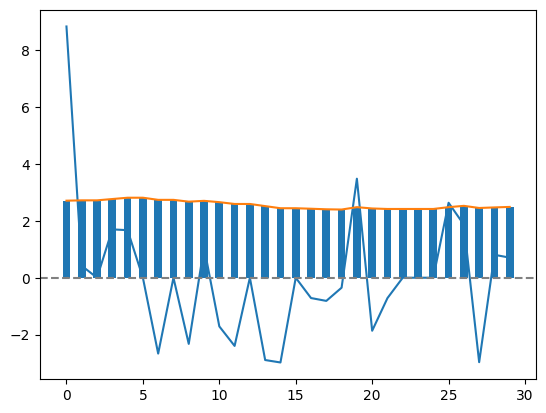

In [479]:
# start_ent < ent after 0-removed

cipher_stream = encode(ciphers[6][2][:30])
plain_stream = encode(plains[2][:30])
diffs = [diff(i_c, i_p) for i_c, i_p in zip(cipher_stream, plain_stream)]

print_list(range(30))
print_list(cipher_stream)
print_list(plain_stream)
print_list(diffs)
print(entropy(Counter(diffs)))

correct=16

# skip the first rising part
# find the first local minimum (think of 8th and 9th removal)
fig, ax = plt.subplots()
optimize_ciphertexts(ciphers[6][2], plains[2], 1, ax=ax, debug=True)

00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
21 20 08 18 08 14 05 05 02 26 13 08 17 05 19 25 18 22 16 06 15 19 11 08 07 18 25 07 20 10 
20 18 05 14 03 08 05 04 00 23 09 03 11 05 18 23 15 18 11 00 15 18 09 05 14 20 01 20 09 15 
01 02 03 04 05 06 00 01 02 03 04 05 06 00 01 02 03 04 05 06 00 01 02 03 20 25 24 14 11 22 
2.4072347217469545
start_ent 2.4072347217469545
0  16.80608 2.8117964276298957 (18)
1  0.62030 2.8292380324220474 (18)
2 -0.61648 2.8117964276298957 (18)
3  0.00000 2.8117964276298957 (18)
4 -0.62030 2.794354822837744 (18)
5 -1.65368 2.7481450108004144 (17)
6 -1.68149 2.7019351987630844 (16)
7  0.00000 2.7019351987630844 (16)
8 -0.64552 2.6844935939709327 (16)
9 -0.42193 2.6731669915179066 (16)
10 -1.72865 2.626957179480577 (15)
11 -1.09512 2.598188972235399 (15)
12 -0.67130 2.580747367443247 (15)
13 -2.46639 2.517095950613766 (14)
14 -2.52876 2.4534445337842845 (13)
15 -1.17256 2.4246763265391063 (13)
16 -1.53384 2.387485734653

'uthrhneebzmhqesyrvpfoskhgrygtjqqdhgnekgkrjyshfucrjzsaqseqksdkqkevhbtvarbksathgtspfpvm k jpfsfrksauksjy qquwgntearxvx eadoeghesggdnxrjvdfqk ccopjzsyaiuegheebvgczhjpjdtycjnoslxanbgixvouuschnymastdbntgaexvnuutgvxeirbrsmjx gtliasjioic ntioicgcvhftjcmsyucolwxovfbrgjgnjfcftblfivd uiegudwkcpqndugrpekmfr utrtemrbxlhqd wqpmyonhbkywxarzbivnkneggdztcpspwixzacnshdxotvcwieleobfbqhredcuwemaeucqfirperwry ejaesg pxhvgow ntblquuljvhdj rprhdhdnjgedpepeophxezunqudqsuden kcgfttffcgqgrjqqdotviogudntcvtumsm lpt rfgkdarosesklpcgdrkgpjpdikjfewmsm dcptwnryafhhniaaukrrfr jpyeq acnhduxafergjy d qdpjyncfpfiejicdxoehutvoixffmcadfiujvlixfcfpwmrktftvdq'

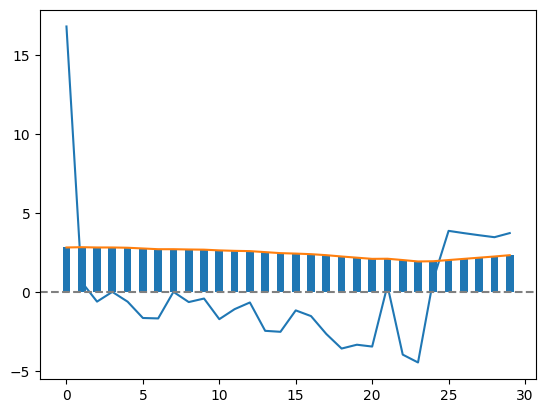

In [480]:
# start_ent < ent after 0-removed
cipher_stream = encode(ciphers[7][2][:30])
plain_stream = encode(plains[2][:30])
diffs = [diff(i_c, i_p) for i_c, i_p in zip(cipher_stream, plain_stream)]

print_list(range(30))
print_list(cipher_stream)
print_list(plain_stream)
print_list(diffs)
print(entropy(Counter(diffs)))

correct=24

fig,ax=plt.subplots()
optimize_ciphertexts(ciphers[7][2], plains[2], 1, ax=ax, debug=True)

00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
05 07 17 25 19 09 16 01 21 11 18 18 05 09 15 18 16 16 20 04 01 03 06 16 13 17 07 21 13 17 
04 05 14 21 14 03 09 01 20 09 15 14 00 03 08 18 15 14 01 24 25 00 09 13 16 05 18 09 12 13 
01 02 03 04 05 06 07 00 01 02 03 04 05 06 07 00 01 02 19 07 03 03 24 03 24 12 16 12 01 04 
2.3874857346534046
start_ent 2.3874857346534046
0  16.56732 2.7830282203847174 (18)
1  0.40699 2.794354822837744 (18)
2  0.00000 2.794354822837744 (18)
3 -2.68320 2.719376803555236 (17)
4 -0.64138 2.7019351987630844 (17)
5 -2.35577 2.638283781933603 (16)
6 -2.84192 2.5633057626510953 (15)
7 -1.80274 2.517095950613766 (14)
8 -1.83584 2.4708861385764362 (13)
9 -1.16429 2.4421179313312584 (13)
10 -0.71420 2.4246763265391067 (13)
11  0.00000 2.4246763265391067 (13)
12 -3.09229 2.349698307256599 (12)
13 -3.19096 2.2747202879740915 (11)
14 -3.66640 2.19131988405106 (10)
15 -2.90471 2.1276684672215787 (9)
16 -2.99160 2.0640170503920974

'egqysipaukrreiorpptdacfpmqgumqslnublrh yrffchljlyotvhhevyougfxtxhtfucgtstiuvhirku slgivfi os crfxjituxwehyienhvxfcebvkwiwivrclucshisuekqkeauycigfxtse t qgtsz cgdqcfvpukfsu wimndvcfhcdwoxzxhtjqdqdxivuukqpkmenlaeuwvttn uqvlevyedqqwhovutbzijlqkazbuinio tcghqky nhgugjxpzfucwf jeqcqdgomomfcvjmlnftdxjfjhjhvcvjapexcepjfmlatkqixygibscbiiflstgqxngslzblhqkgy egsisjhbmgchtwkkidlcepjfsodcoixfyeeggmhg eebfsahprebnzjzjuhnffcgttmutkqkqdgajtagvtvz ethklkolrarum osehgvdyktpugudfthesqeixfnljuwiskkt tcuxtxpambgmxzyutviyqtlstbyseuoslbtadzmoscarushzvrjpjdi wlfzhhevptbucxwgptptryxre vpomln eebfvcv ohtdtmky pxfawxkesaohxfslraglxmky ngomtxht'

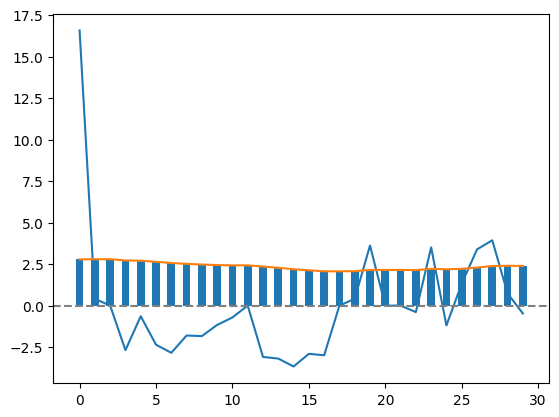

In [481]:
# start_ent < ent after 0-removed
cipher_stream = encode(ciphers[8][1][:30])
plain_stream = encode(plains[1][:30])
diffs = [diff(i_c, i_p) for i_c, i_p in zip(cipher_stream, plain_stream)]

print_list(range(30))
print_list(cipher_stream)
print_list(plain_stream)
print_list(diffs)
print(entropy(Counter(diffs)))

correct=18

fig,ax=plt.subplots()
optimize_ciphertexts(ciphers[8][1], plains[1], 1, ax=ax, debug=True)

In [251]:
# Allow optimzations to 2 chars (int(30 * PROB + 1))
def decrypt(cipher, search=30, threshold=0.034, ax = None):
    cipher_stream = encode(cipher[:search])
    ents =  []
    for plain in plains:
        plain_stream = encode(plain[:search])
        diffs = [diff( i_c, i_p ) for i_c, i_p in zip(cipher_stream, plain_stream)]
        counter = Counter(diffs)
        ent = entropy(counter)
        ents.append(ent)

    min_ent = min(ents)
    ent_avg = avg(ents)
    ent_std = std(ents)

    # Try to guess the plaintext from the anomaly
    for i, ent in enumerate(ents, 1):
        if ent == min_ent and ent_std > threshold:
            if ax:
                ax.bar(range(1, 6), ents)
                ax.bar(i, ent, color='red')
    
                ax.axhline(ent_avg, color='r', linestyle='--', label='avg')
                ax.axhline(ent_avg - 2 * ent_std, color='gray', linestyle='-.', label='-2 std')
                ax.axhline(ent_avg + 2 * ent_std, color='gray', linestyle='-.', label='+2 std')
                ax.set_title(f'std={ent_std:.4f}')
            return i

    # Optimize the plaintext
    expected_randoms = int(30 * PROB + 1)
    stds = []
    ents_list = []
    for n in range(1, expected_randoms + 1):
        ents = []
        for plain in plains:
            new_cipher = optimize_ciphertexts(cipher, plain, n)
            plain_stream = encode(plain[:search])
            new_cipher_stream = encode(new_cipher[:search])
            diffs = [diff( i_c, i_p ) for i_c, i_p in zip(new_cipher_stream, plain_stream)]
            counter = Counter(diffs)
            ent = entropy(counter)
            ents.append(ent)

        ents_list.append(ents)
        min_ent = min(ents)
        ent_avg = avg(ents)
        ent_std = std(ents)
        stds.append(ent_std)

        for i, ent in enumerate(ents, 1):
            if ent == min_ent and ent_std > threshold:
                if ax:
                    ax.bar(range(1, 6), ents)
                    ax.bar(i, ent, color='red')
        
                    ax.axhline(ent_avg, color='r', linestyle='--', label='avg')
                    ax.axhline(ent_avg - 2 * ent_std, color='gray', linestyle='-.', label='-2 std')
                    ax.axhline(ent_avg + 2 * ent_std, color='gray', linestyle='-.', label='+2 std')

                    ax.set_title(f'std={ent_std:.4f}')
                return i

    max_std = max(stds)
    for i, s in enumerate(stds):
        if s == max_std and s > threshold:
            if ax:
                ents = ents_list[i]
                for i, ent in enumerate(ents, 1):
                    if ent == min_ent and ent_std > threshold:
                        if ax:
                            ax.bar(range(1, 6), ents)
                            ax.bar(i, ent, color='red')
                
                            ax.axhline(ent_avg, color='r', linestyle='--', label='avg')
                            ax.axhline(ent_avg - 2 * ent_std, color='gray', linestyle='-.', label='-2 std')
                            ax.axhline(ent_avg + 2 * ent_std, color='gray', linestyle='-.', label='+2 std')
        
                            ax.set_title(f'std={ent_std:.4f}')
                        return i

    # Nothing interesting found, just plot the original data

    cipher_stream = encode(cipher[:search])
    ents =  []
    for plain in plains:
        plain_stream = encode(plain[:search])
        diffs = [diff( i_c, i_p ) for i_c, i_p in zip(cipher_stream, plain_stream)]
        counter = Counter(diffs)
        ent = entropy(counter)
        ents.append(ent)

    min_ent = min(ents)
    ent_avg = avg(ents)
    ent_std = std(ents)
    
    if ax:
        ax.bar(range(1, 6), ents)

        ax.axhline(ent_avg, color='r', linestyle='--', label='avg')
        ax.axhline(ent_avg - 2 * ent_std, color='gray', linestyle='-.', label='-2 std')
        ax.axhline(ent_avg + 2 * ent_std, color='gray', linestyle='-.', label='+2 std')
        ax.set_title(f'std={ent_std:.4f}')

decrypt1(ciphers[4][1])

2

true positive 27.61904761904762
false positive 2.857142857142857


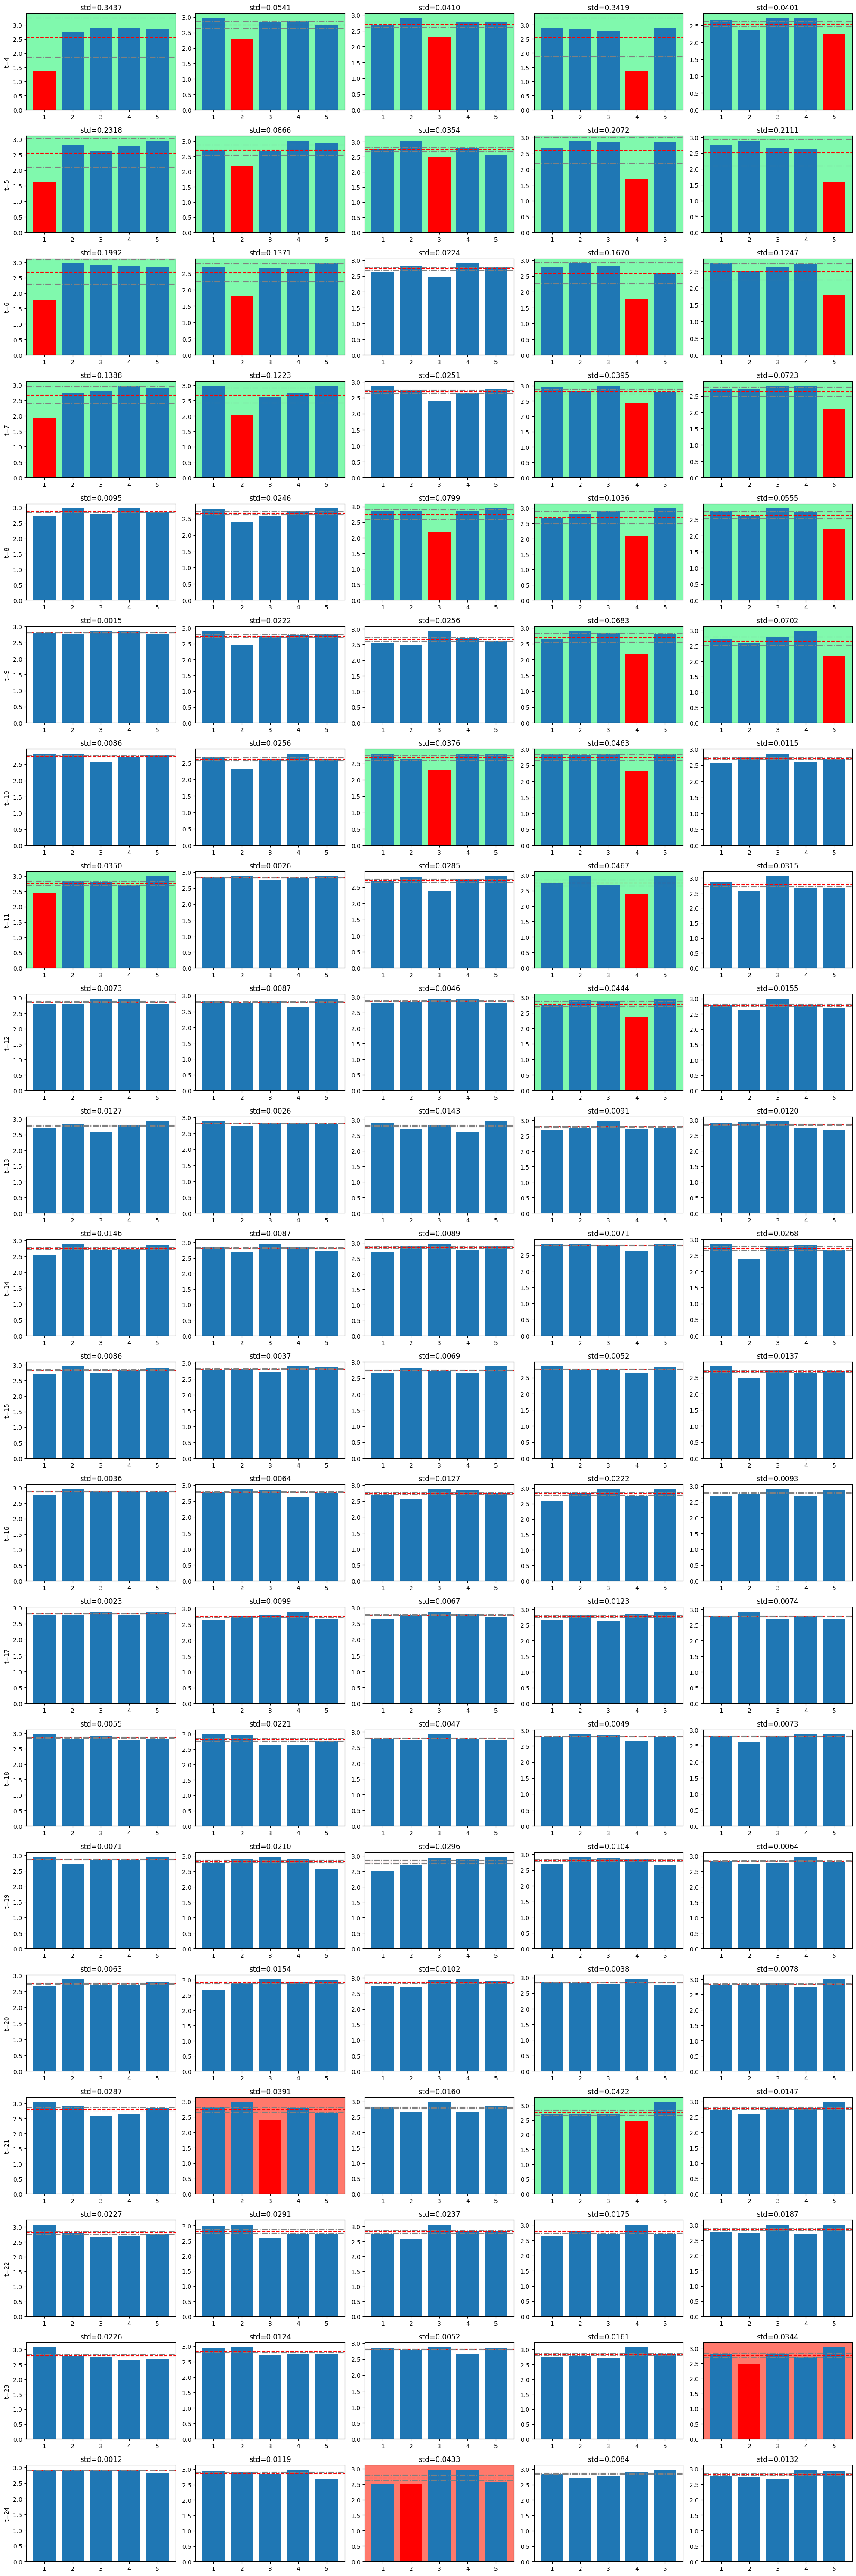

In [284]:
fig, axes = plt.subplots(len(keys), 5, figsize=(20, 60))

guessed_correctly = 0
guessed_wrongly = 0

for key in keys:
    k = key - 4
    ax_row = axes[key-4]
    ax_row[0].set_ylabel(f't={key}')
    for ci, ciphertext in enumerate(ciphers[key], 1):
        ax = ax_row[ci-1]
        guess = decrypt(ciphertext, search=30, threshold=0.034, ax=ax)
        if guess and guess == ci:
            guessed_correctly += 1
            ax.set_facecolor('xkcd:seafoam')
        if guess and guess != ci:
            guessed_wrongly += 1
            ax.set_facecolor('xkcd:salmon')

print('true positive', guessed_correctly / (len(keys) * 5) * 100)
print('false positive', guessed_wrongly / (len(keys) * 5) * 100)

plt.tight_layout()
plt.show()

true positive 25.71428571428571
false positive 6.666666666666667


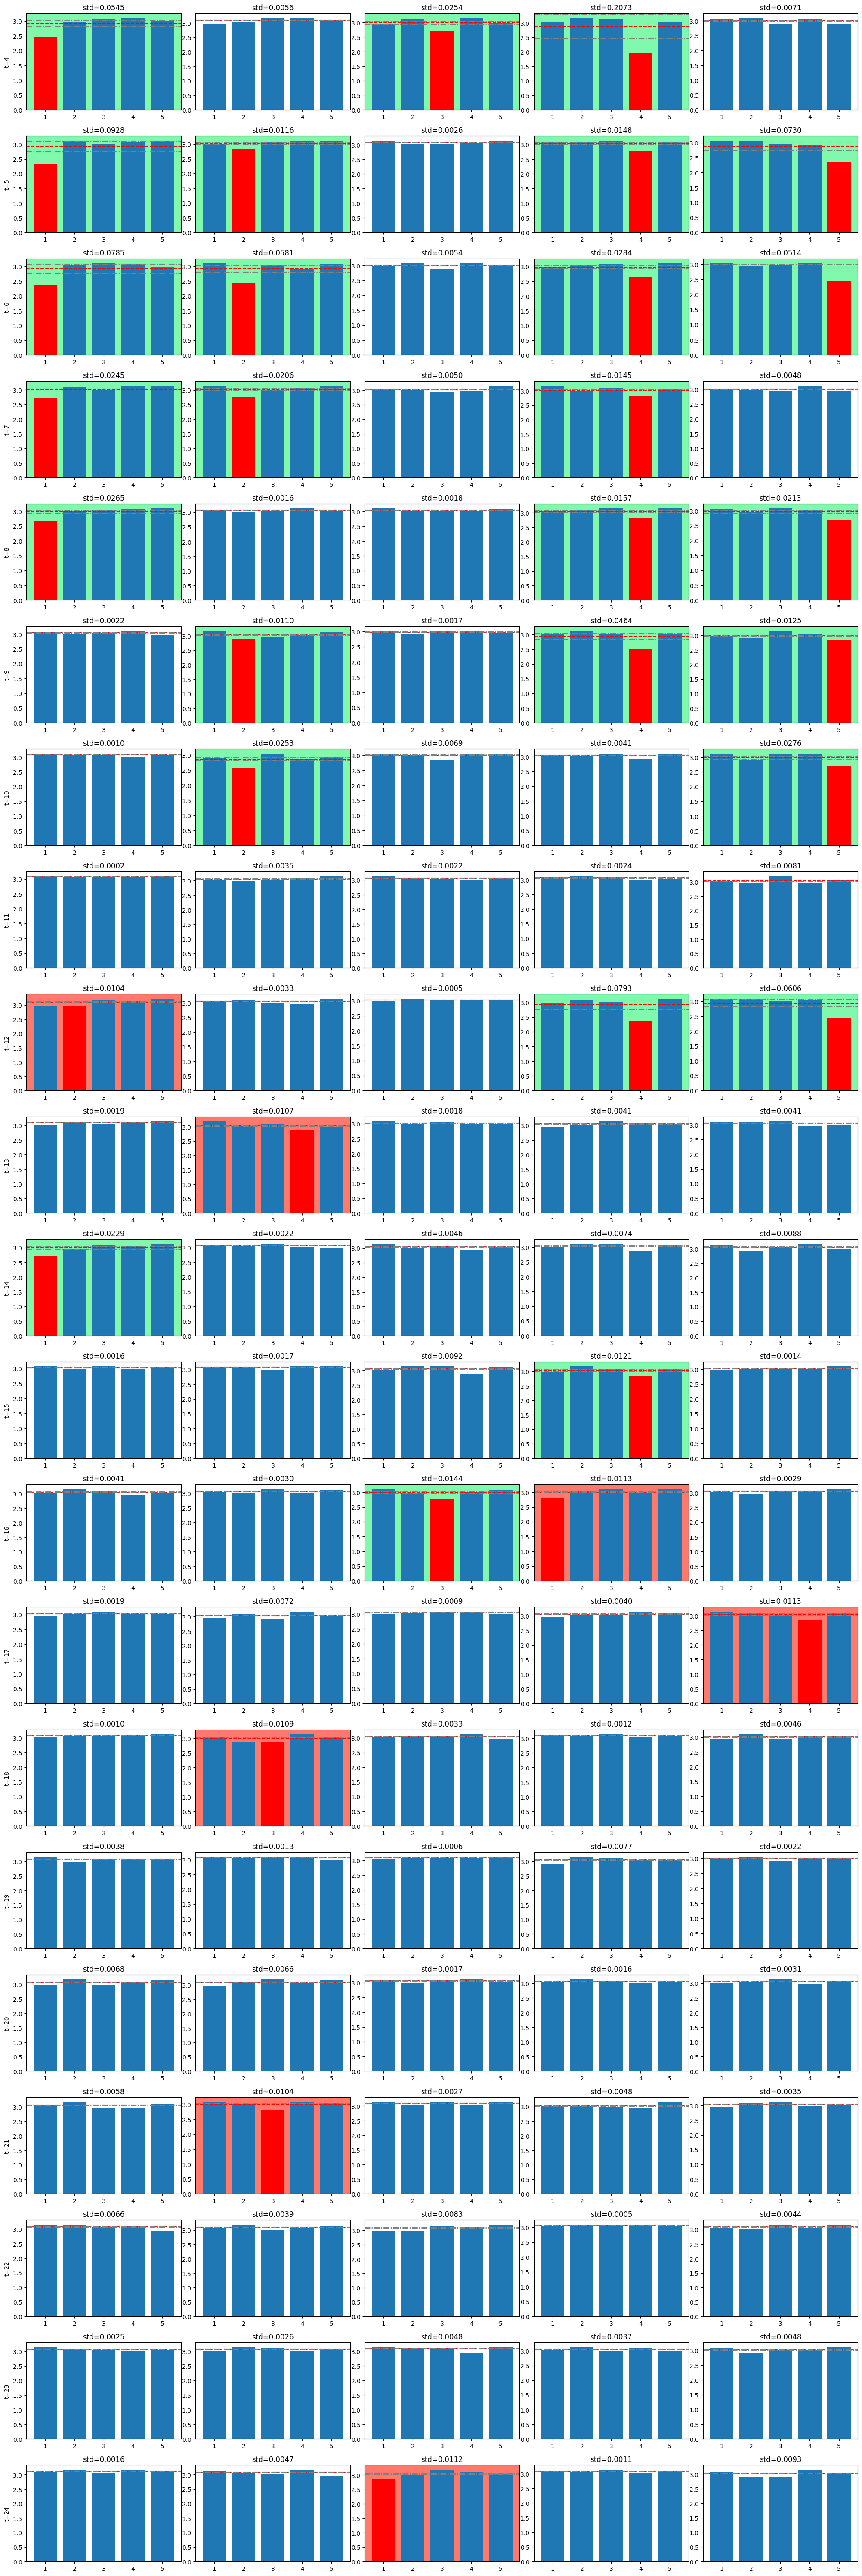

In [285]:
fig, axes = plt.subplots(len(keys), 5, figsize=(20, 60))

guessed_correctly = 0
guessed_wrongly = 0

for key in keys:
    k = key - 4
    ax_row = axes[key-4]
    ax_row[0].set_ylabel(f't={key}')
    for ci, ciphertext in enumerate(ciphers[key], 1):
        ax = ax_row[ci-1]
        guess = decrypt(ciphertext, search=60, threshold=0.01, ax=ax)
        if guess and guess == ci:
            guessed_correctly += 1
            ax.set_facecolor('xkcd:seafoam')
        if guess and guess != ci:
            guessed_wrongly += 1
            ax.set_facecolor('xkcd:salmon')

print('true positive', guessed_correctly / (len(keys) * 5) * 100)
print('false positive', guessed_wrongly / (len(keys) * 5) * 100)

plt.tight_layout()
plt.show()

true positive 27.61904761904762
false positive 2.857142857142857


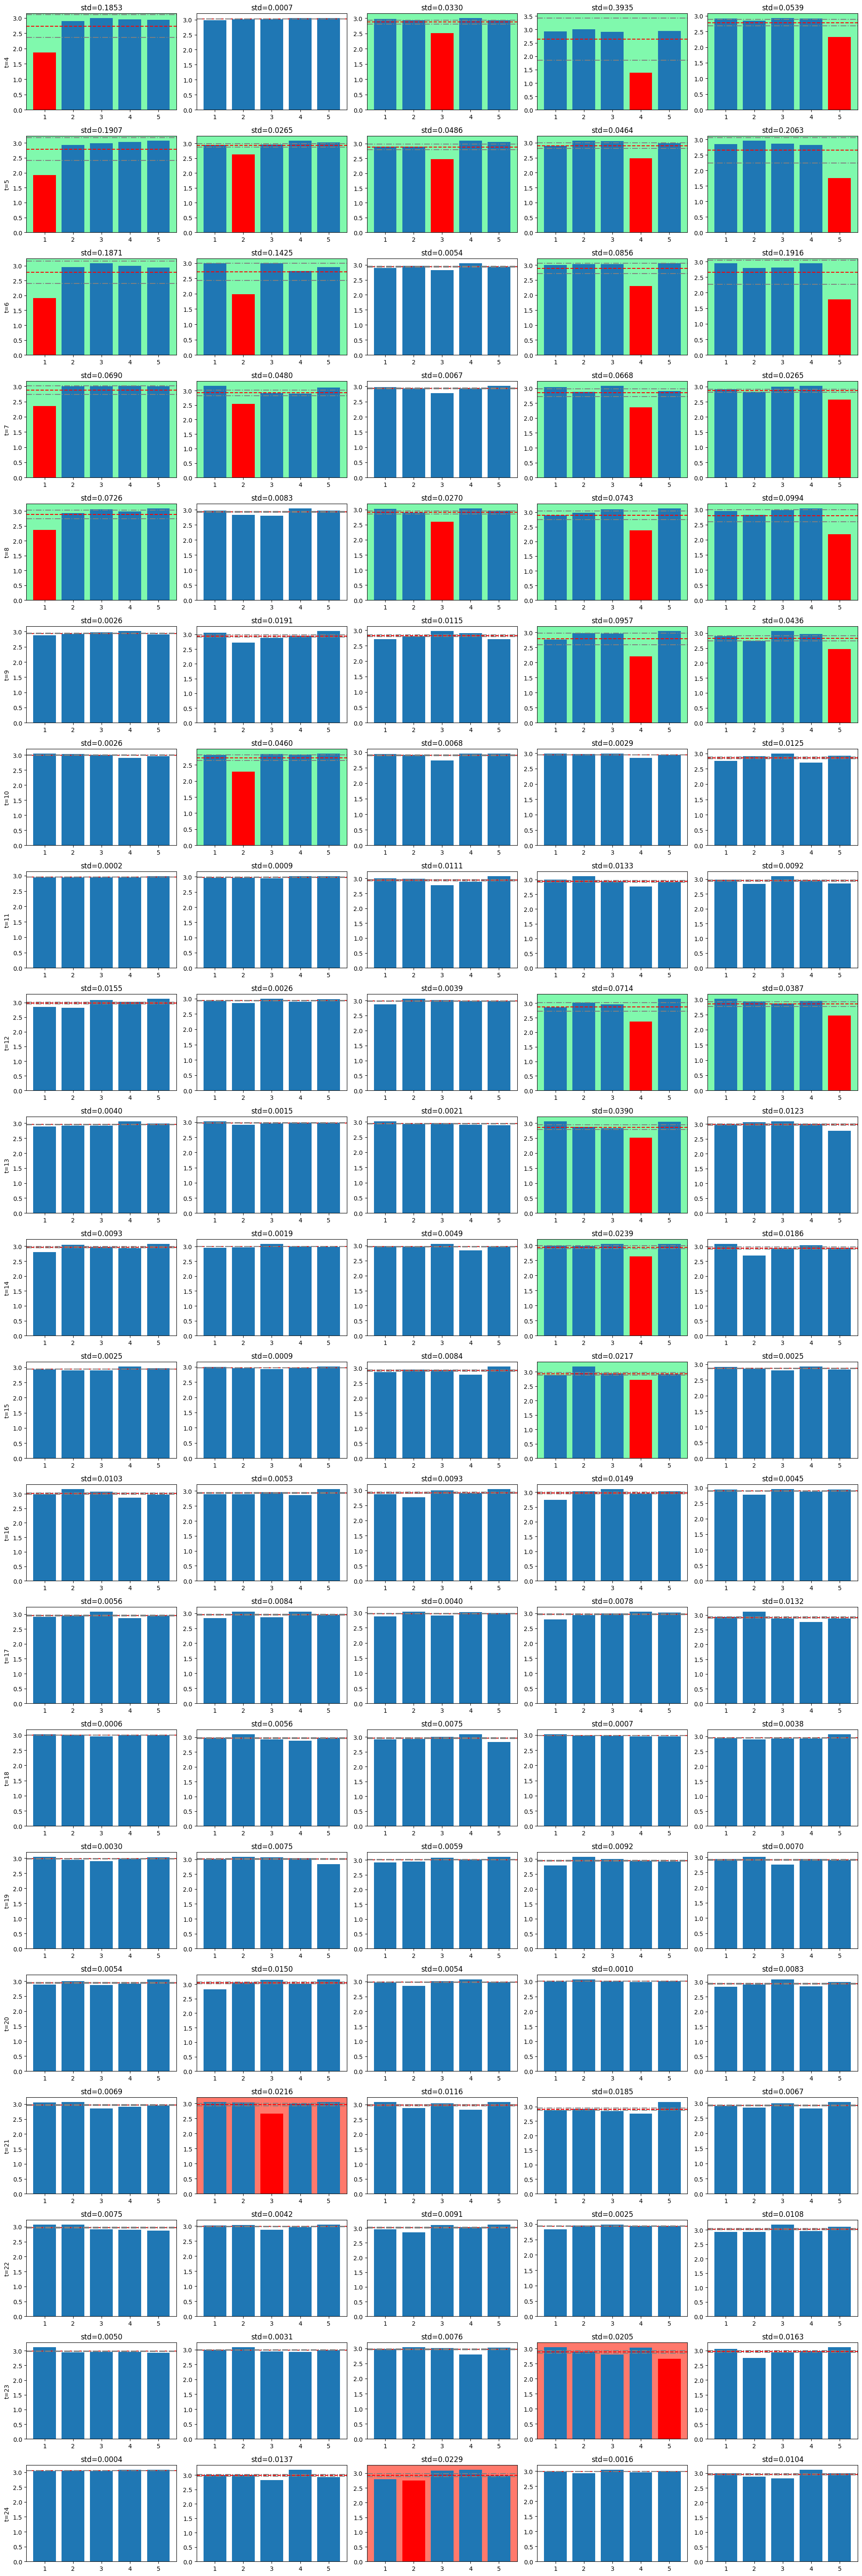

In [182]:
fig, axes = plt.subplots(len(keys), 5, figsize=(20, 60))

guessed_correctly = 0
guessed_wrongly = 0

for key in keys:
    k = key - 4
    ax_row = axes[key-4]
    ax_row[0].set_ylabel(f't={key}')
    for ci, ciphertext in enumerate(ciphers[key], 1):
        ax = ax_row[ci-1]
        guess = decrypt(ciphertext, search=45, threshold=0.02, ax=ax)
        if guess and guess == ci:
            guessed_correctly += 1
            ax.set_facecolor('xkcd:seafoam')
        if guess and guess != ci:
            guessed_wrongly += 1
            ax.set_facecolor('xkcd:salmon')

print('true positive', guessed_correctly / (len(keys) * 5) * 100)
print('false positive', guessed_wrongly / (len(keys) * 5) * 100)

plt.tight_layout()
plt.show()

true positive 31.428571428571427
false positive 32.38095238095238


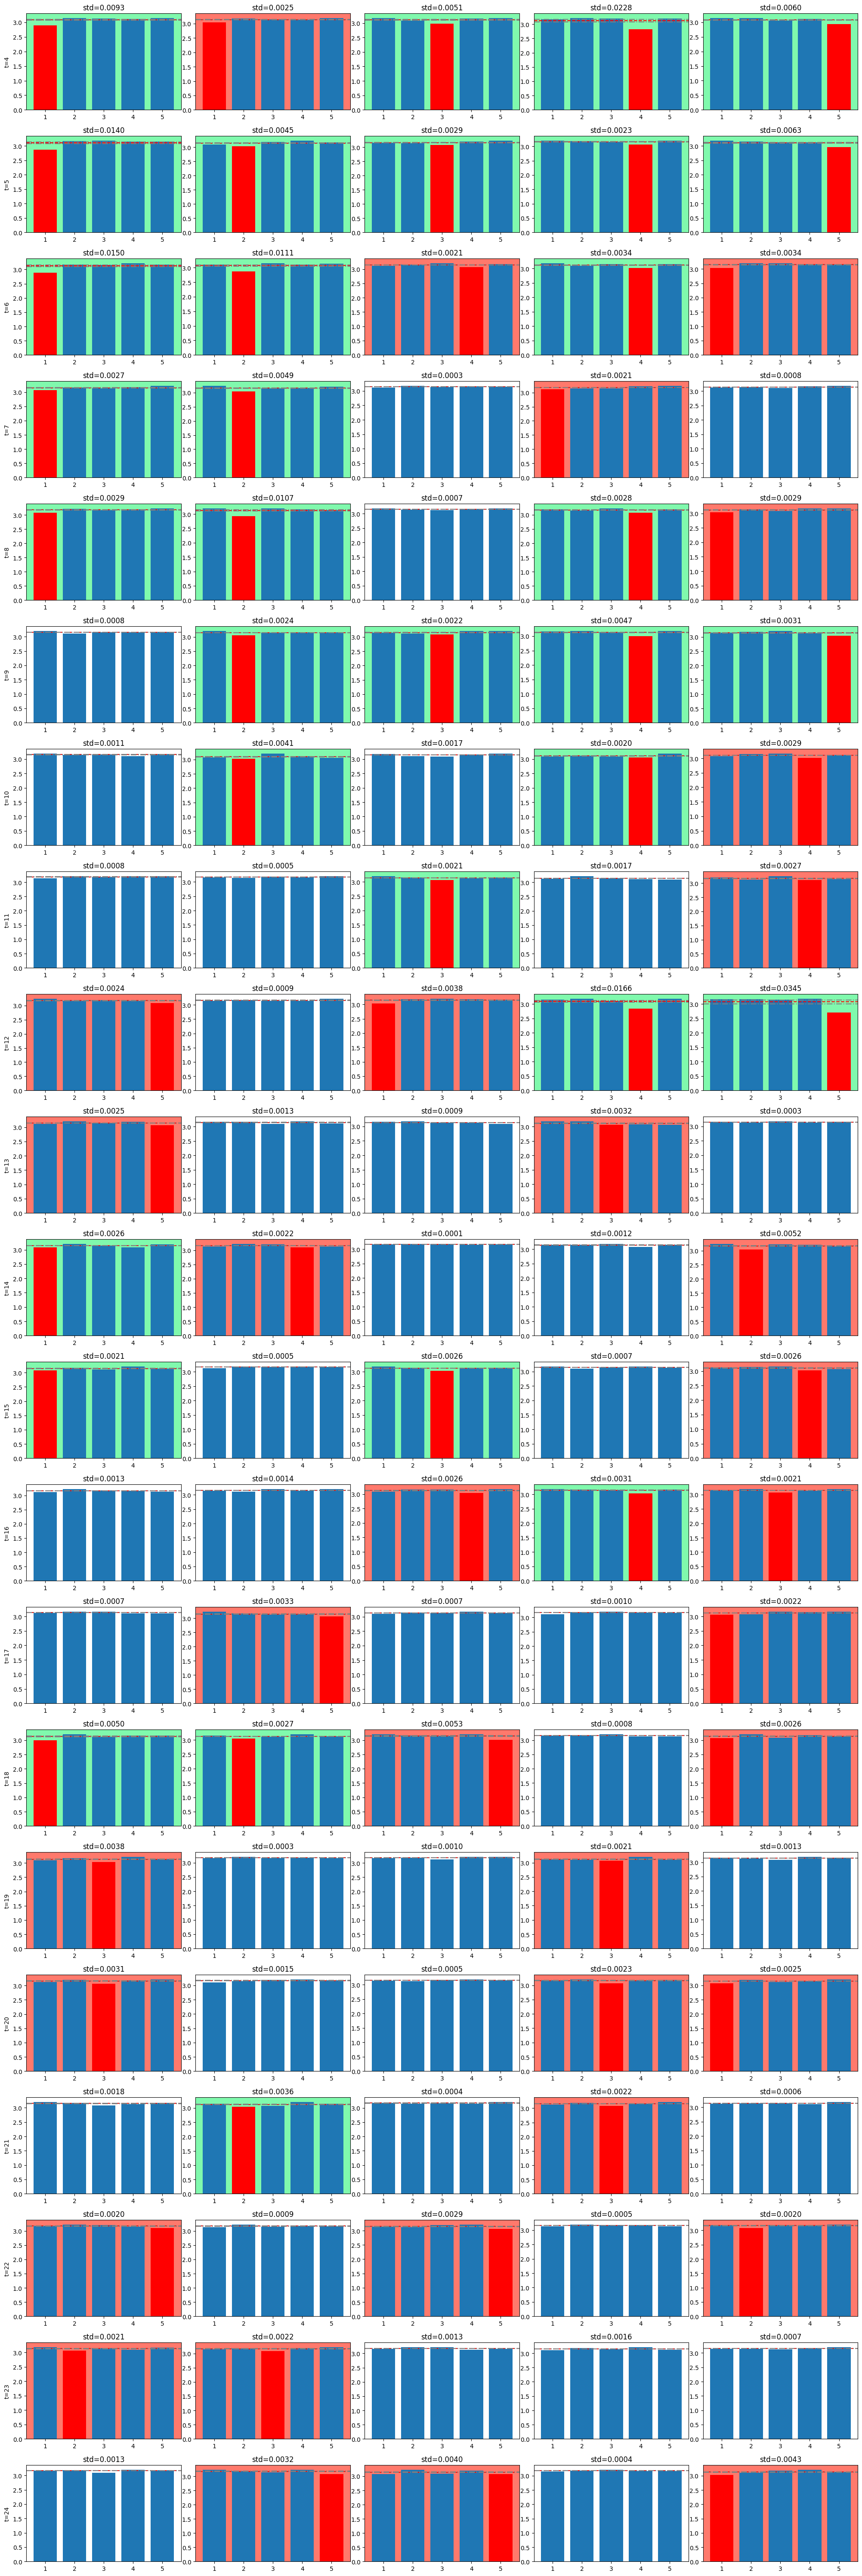

In [183]:
fig, axes = plt.subplots(len(keys), 5, figsize=(20, 60))

guessed_correctly = 0
guessed_wrongly = 0

for key in keys:
    k = key - 4
    ax_row = axes[key-4]
    ax_row[0].set_ylabel(f't={key}')
    for ci, ciphertext in enumerate(ciphers[key], 1):
        ax = ax_row[ci-1]
        guess = decrypt(ciphertext, search=100, threshold=0.002, ax=ax)
        if guess and guess == ci:
            guessed_correctly += 1
            ax.set_facecolor('xkcd:seafoam')
        if guess and guess != ci:
            guessed_wrongly += 1
            ax.set_facecolor('xkcd:salmon')

print('true positive', guessed_correctly / (len(keys) * 5) * 100)
print('false positive', guessed_wrongly / (len(keys) * 5) * 100)

plt.tight_layout()
plt.show()

In [17]:
@dataclass
class DecryptionResult:
    guess: int
    method: str

In [22]:
def trends_stats_test(ciphertext, plaintexts):
    entropy_trends = []
    for plaintext in plaintexts:
        _, Y = progressing_entropy_analysis(ciphertext, plaintext)
        entropy_trends.append(Y)

    diffs = []
    for i in range(len(entropy_trends)):
        for j in range(i + 1, len(entropy_trends)):
            trend_i = entropy_trends[i]
            trend_j = entropy_trends[j]
            diff = measure_trend_diff(trend_i, trend_j)
            diffs.append(diff)

    diff_avg = sum(diffs) / len(diffs)
    diff_var = sum((d - diff_avg) ** 2 for d in diffs) / len(diffs)
    diff_std = math.sqrt(diff_var)

    return diff_avg, diff_std, diffs, entropy_trends

def select_anomaly(entropy_trends, diffs, diff_avg, diff_std):
    anoms = []
    cs = combinations(range(len(entropy_trends)), 2)
    for (i, j), d in zip(cs, diffs):
        if d > diff_avg + 0.25 * diff_std:
            # smaller one is the anomaly
            if compare_trend(entropy_trends[i], entropy_trends[j]) > 0:
                anoms.append(j)
            else:
                anoms.append(i)
    
    print(f"[*] Anomaly indices: {anoms}")
    
    return anoms

def decrypt(ciphertext):
    diff_avg, diff_std, diffs, entropy_trends = trends_stats_test(ciphertext, plains)

    print("[*] Measure of difference between trends without any ciphertext modification")
    print(f"[*] Average: {diff_avg}")
    print(f"[*] Standard deviation: {diff_std}")

    if diff_std < ANOMALY_THRESHOLD:
        return DecryptionResult(
            guess=None,
            method="No anomaly found"
        )
    #     for n in range(1, int(SEARCH_SPACE * PROB)):
    #         for plaintext in plains:
    #             new_cipher = optimize_ciphertexts(ciphertext, plaintext, n)
    #             new_diff_avg, new_diff_std, new_diffs, _ = trends_stats_test(new_cipher, plains)
    #             if new_diff_std >= ANOMALY_THRESHOLD:
    #                 anoms = select_anomaly(entropy_trends, new_diffs, new_diff_avg, new_diff_std)
    #                 if anoms:
    #                     return DecryptionResult(
    #                         guess=Counter(anoms).most_common(1)[0][0] + 1,
    #                         method=f"Removed {n} chars from ciphertext"
                        # )

    anoms = []
    cs = combinations(range(len(entropy_trends)), 2)
    for (i, j), d in zip(cs, diffs):
        if d > diff_avg + 0.25 * diff_std:
            # smaller one is the anomaly
            if compare_trend(entropy_trends[i], entropy_trends[j]) > 0:
                anoms.append(j)
            else:
                anoms.append(i)

    if not anoms:
        return DecryptionResult(
            guess=None,
            method="Anomaly threshold touched, but no anomaly found"
        )

    guess = Counter(anoms).most_common(1)
    return DecryptionResult(
        guess=guess[0][0] + 1,
        method="Anomaly threshold touched, anomaly found"
    )

In [23]:
correct_cases = 0
total_cases = len(keys[:4]) * len(ciphers[4])
for k in keys[:4]:
    ciphertexts = ciphers[k]
    for i, cipher in enumerate(ciphertexts, 1):
        result = decrypt(cipher)
        if result.guess == i:
            correct_cases += 1
            print(f'{k}, {i}: O ({result.method})', flush=True)
        else:
            print(f'{k}, {i}: X ({result.guess}, {result.method})', flush=True)

print(f'Total testcases: {total_cases}')
print(f'Correct cases: {correct_cases}')
print(f'Accuracy: {correct_cases / total_cases * 100}')

[*] Measure of difference between trends without any ciphertext modification
[*] Average: 1.541881079553368
[*] Standard deviation: 1.7606439253279769
4, 1: O (Anomaly threshold touched, anomaly found)
[*] Measure of difference between trends without any ciphertext modification
[*] Average: 0.27316464832982607
[*] Standard deviation: 0.2397745549568368
4, 2: X (None, No anomaly found)
[*] Measure of difference between trends without any ciphertext modification
[*] Average: 0.08036128633194736
[*] Standard deviation: 0.05512466304751522
4, 3: X (None, No anomaly found)
[*] Measure of difference between trends without any ciphertext modification
[*] Average: 1.2508374599627785
[*] Standard deviation: 1.3924702409907344
4, 4: O (Anomaly threshold touched, anomaly found)
[*] Measure of difference between trends without any ciphertext modification
[*] Average: 0.09461407260916369
[*] Standard deviation: 0.06501640094981097
4, 5: X (None, No anomaly found)
[*] Measure of difference between t

# Progressing Entropy Analysis

## What is Entropy?

An entropy, or [information entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)),
is a measure of amount of information conveyed by an event.
An entropy may be interpreted as **surprise**, or **uncertainty**, because if an event is associated with a high entropy,
it implies something surprising or uncertain happened.

## What this analysis show?

First, we subtract a ciphertext with a plaintext. Then, we can observe the amount of shift applied to each character.

Let's take an example of (cipher_4, plain_1_4).

Because the encryption uses a key repeatedly, the shifts will be observed like:

```
2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, ...
```

It shows that shifts have a cyclic pattern.

However, if a random character inserted, the shifts will change drastically as follows:

```
2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 11, 26, 10, 15, 13, 26, 12,
```

Why?
It is because something surprising happend, which is a random character getting inserted, breaking the normal cyclic pattern.
In other words, we can observe an entropy increase.
It also implies the amount of information by observing the shifts surges up!

You can check this fact at the plots of `cipher_1`, `cipher_3` and `cipher_4` cases.
The matching cipher-plaintext pairs shows a differnt progressing trend (low at start, a steep increase at some point) in the cases.


## Why `cipher_2` and `cipher_5` cases are not working?

For this analysis to work, we need a following assumption:
the first `N` characters should show a cyclic pattern.

But, in `cipher_2` and `cipher_5` cases, the first `N` characters
do not show such pattern.
It is because a random character(s) is already inserted to the them.

How to solve?

- We can guess a good `N` (see below, or Kasiski examination)
- For the first `N` character,
    * try to delete a character
    * check whether a cyclic pattern shows up
        + entropy decreases or not
        + distances between same shifts
    * do this exhaustively

Since the problem is a random character in the first `N` character,
we recover the cyclic pattern of first `N` characters.


## How to know which `N` is good?

The proper `N` value will be a multiple of key length.
In this example, the ciphertexts are generated with a key of length 4,
thus `N` is set to 8.

To infer a key length, one can conduct a Kasiski examination,
to extract common factors of possible key lengths.


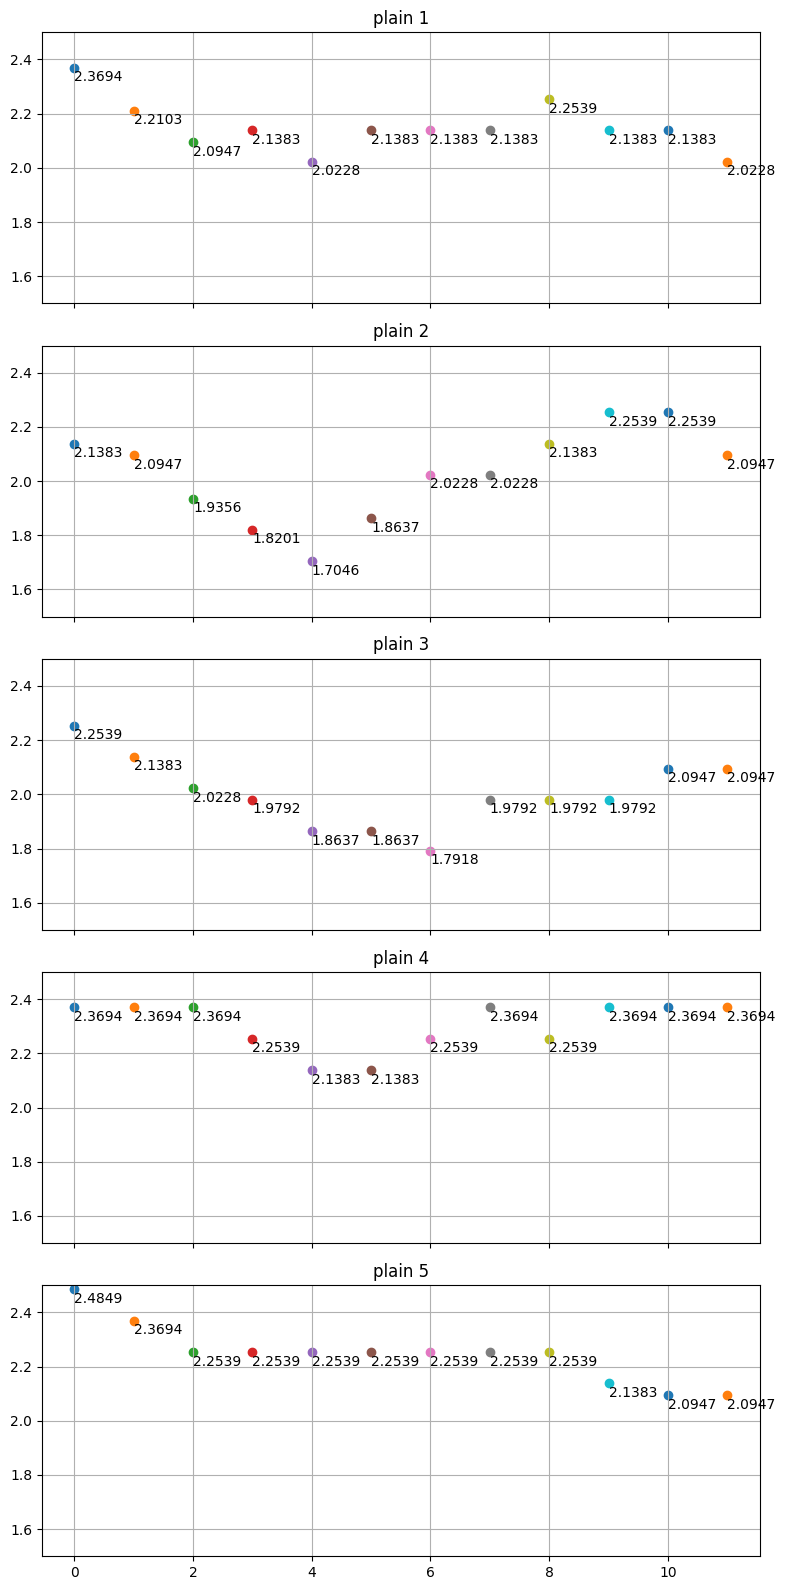

In [7]:
# Let's demonstrate a technique to recover the cyclic pattern in the first N characters

N = 12
ciphertext = cipher_2

fig, axes = plt.subplots(5, 1, sharex=True, figsize=(8, 16))

def select_cipher(i):
    return ciphertext[:i] + ciphertext[i+1:N+1]

for i, plaintext in enumerate(plains):
    plain_stream = encode(plaintext[:N])
    axes[i].set_ylim(1.5, 2.5)
    axes[i].grid()
    min_ent = float('inf')
    for j in range(N):
        ciphertext_j = select_cipher(j)
        cipher_stream = encode(ciphertext_j)
        diffs = [diff( i_c, i_p ) for i_c, i_p in zip(cipher_stream, plain_stream)]
        diff_counter = Counter(diffs)
        ent = entropy(diff_counter)
        if ent < min_ent:
            min_ent = ent
        axes[i].scatter(j, ent)
        axes[i].annotate(f'{ent:.4f}', (j, ent - 0.05))
    axes[i].set_title(f'plain {i+1}')

fig.tight_layout()

We can observe that, for the second plaintext,
if 4-th (0-indexed) character removed, the entropy is much lower than others.
Therefore, we can conclude that the removed character was a random character!

But, wait. The plain3 with 6th character removed case shows that entropy metric can wrongly indicate a cyclic pattern is restored! The entropy here is 1.7918, while the one of plain2 with 4th character removed is 1.7046. How close!

The entropy metric used indicates only how widely spread the distribution of shifts.
So, shifts such as `[4, 4, 4, 3, 3, 3, ...]` will have same entropy to `[4, 3, 4, 3, 4, 3, ...]`.
But, if we consider how the encryption is done, the latter one should have **LESS** entropy.

So, we have unanswered questions as below:

* How to encode positional information into the entropy metric?
* How to tell if an entropy is much lower than others? Using a threshold, or a ratio?

## Putting it all together

1. Progressing entropy analysis
    - If an anomaly observed, we can conclude which plaintext the ciphertext is encrypted from
    - Otherwise, we have to guess the random character position

In [28]:
def measure_trend_diff(pa, pb):
    return sum((a - b) ** 2 for a, b in zip(pa, pb))

def decrypt(ciphertext, end=16):
    progressing_ents = []
    for plaintext in plains:
        _, Y = progressing_entropy_analysis(ciphertext, plaintext, end=end)
        progressing_ents.append(Y)

    # examine if there is any anomaly
    cs = combinations(range(len(progressing_ents)), 2)
    ents_comb = combinations(progressing_ents, 2)
    ij_ents = list(zip(cs, ents_comb))
    diffs = []
    for (i, j), (pa, pb) in ij_ents:
        td = measure_trend_diff(pa, pb)
        diffs.append(td)
        # print(i,j, td)

    diff_avg = sum(diffs) / len(diffs)
    diff_var = sum((d - diff_avg) ** 2 for d in diffs) / len(diffs)
    diff_std = math.sqrt(diff_var)

    if diff_std < 0.8:
        print("Can't be determined by first N chars")
        return diffs, None

    anoms = []
    cs = combinations(range(len(progressing_ents)), 2)
    for (i, j), d in zip(cs, diffs):
        if d > diff_avg + 0.25 * diff_std:
            anoms.append(i)
            anoms.append(j)

    guess = Counter(anoms).most_common(1)
    if len(guess) == 0:
        return diffs, None
    return diffs, Counter(anoms).most_common(1)[0][0]


cipher_1 cracked

Can't be determined by first N chars
cipher_2 failed

cipher_3 cracked

cipher_4 cracked

Can't be determined by first N chars
cipher_5 failed



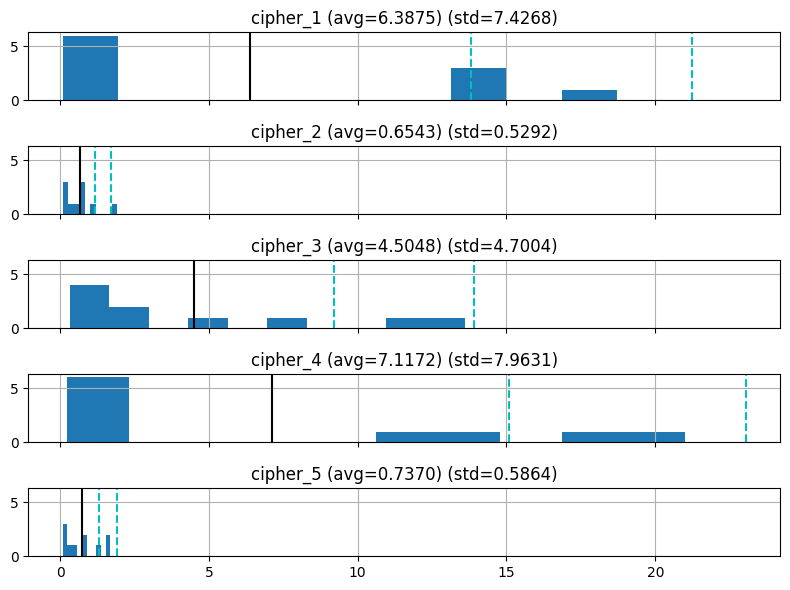

In [44]:
fig, axes = plt.subplots(5, 1, figsize=(8, 6), sharex=True, sharey=True)

for i, ciphertext in enumerate(ciphers):
    diffs, guess = decrypt(ciphertext, end=12 * 2)
    diff_avg = sum(diffs) / len(diffs)
    diff_var = sum((d - diff_avg) ** 2 for d in diffs) / len(diffs)
    diff_std = math.sqrt(diff_var)
    axes[i].hist(diffs)
    axes[i].axvline(diff_avg, color='k', linestyle='-')
    axes[i].axvline(diff_avg + diff_std, color='c', linestyle='--')
    axes[i].axvline(diff_avg + diff_std * 2, color='c', linestyle='--')
    axes[i].grid()
    axes[i].set_title(f'cipher_{i+1} (avg={diff_avg:.4f}) (std={diff_std:.4f})')
    if guess is None:
        print(f'cipher_{i+1} failed\n')
        continue

    if guess == i:
        print(f'cipher_{i+1} cracked')
    else:
        print(f'cipher_{i+1} failed')
    print()

fig.tight_layout()

cipher_1 cracked

Can't be determined by first N chars
cipher_2 failed

cipher_3 cracked

cipher_4 cracked

Can't be determined by first N chars
cipher_5 failed



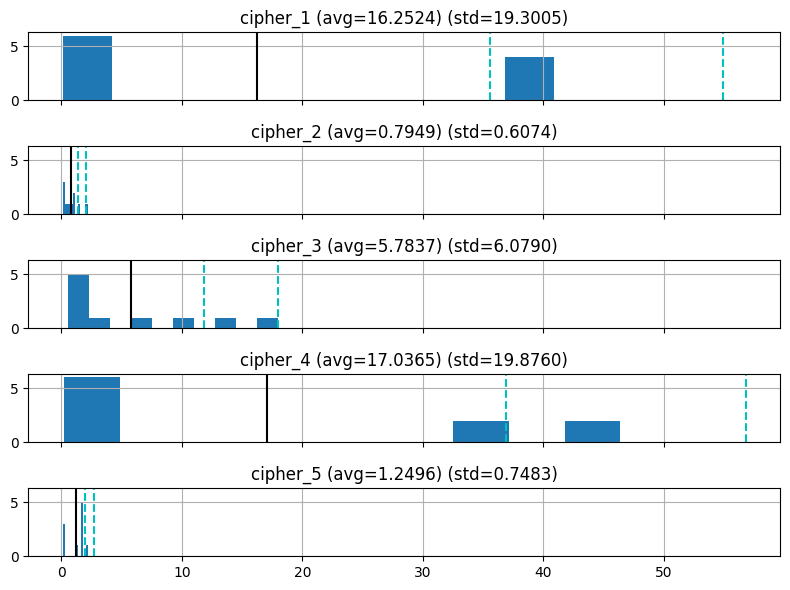

In [43]:
fig, axes = plt.subplots(5, 1, figsize=(8, 6), sharex=True, sharey=True)

for i, ciphertext in enumerate(ciphers):
    diffs, guess = decrypt(ciphertext, end=12 * 3)
    diff_avg = sum(diffs) / len(diffs)
    diff_var = sum((d - diff_avg) ** 2 for d in diffs) / len(diffs)
    diff_std = math.sqrt(diff_var)
    axes[i].hist(diffs)
    axes[i].axvline(diff_avg, color='k', linestyle='-')
    axes[i].axvline(diff_avg + diff_std, color='c', linestyle='--')
    axes[i].axvline(diff_avg + diff_std * 2, color='c', linestyle='--')
    axes[i].grid()
    axes[i].set_title(f'cipher_{i+1} (avg={diff_avg:.4f}) (std={diff_std:.4f})')
    if guess is None:
        print(f'cipher_{i+1} failed\n')
        continue

    if guess == i:
        print(f'cipher_{i+1} cracked')
    else:
        print(f'cipher_{i+1} failed')
    print()

fig.tight_layout()